# Credit Amount EDA Case Study

### Introduction

We have loan applications data for about 300k applications. The goal of this case is to perform Risk Analytics with the help of data wrangling and visualisation libraries of Python. The end goal is to derive important insights for the bank to identify the characteristics for bad loan applications. ( Bad loans are loans which are delayed/not paid.)

### Objectives

* Identify what are some common characteristics of bad loan applications
* Identify if there are any patterns related to applicants with loan difficulties
* Identify the driving factors or strong indicators of a bad loan application

### Data Dictionary

A common starting point in any EDA problem is - Understanding the data.

The first step is to check if there is a data dictionary availalble, and try to get a good understanding of the
level of the data and meaning of each of the columns.

The data dictionary document has been provided along with the data. It is advised to go through each of the column in
data once before starting with EDA.

# EDA - Credit  Applications

### **📈 Exploratory Data Analysis (EDA) – Workflow Overview**

The EDA process for this case study will follow the structure outlined below:

***

### **1. Data Wrangling**
- **Data Import & Initial Exploration**  
  Load the dataset and perform a quick overview to understand its content.  
- **Shape and Structure Examination**  
  Review the dimensions, format, and composition of the dataset.  
- **Data Types & Column Summary**  
  Inspect data types of each variable and note categorical vs. numerical features.  
- **Statistical Overview (`.describe()`)**  
  Generate a five-number summary to identify key descriptive statistics.  
- **Preprocessing & Basic Cleaning**  
  - Manage invalid or placeholder entries (e.g., `XNA`, `365243`).  
  - Conduct a missing value assessment.  
  - Create categorical bins for major continuous features (e.g., `AMT_INCOME_TOTAL`, `DAYS_BIRTH`, `AMT_CREDIT`) to aid deeper analysis.

***

### **2. Univariate Analysis**
- **Distribution Exploration**  
  Examine the distribution of individual variables:  
  - *Numerical features* → Histograms or boxplots  
  - *Categorical features* → Countplots or frequency tables

***

### **3. Bivariate / Multivariate Analysis**
- **Feature Relationships with the Target (`TARGET`)**  
  Analyze how different features relate to the target variable.  
- **Group-Level Comparisons**  
  Perform aggregated or binned analyses to identify category-level trends.  
- **Visual Exploration**  
  Use plots such as countplots, boxplots, and violinplots for comparative analysis.  
- **Optional Step:** Correlation analysis among numerical features for pattern detection.

***

### **4. Insight Generation**
- Summarize **key business insights** derived from the analysis.  
- Highlight **patterns and variables** that may impact loan default predictions.

***

> ⚠️ **Note:** Steps such as feature engineering, encoding, scaling, and model building are outside the scope of EDA.  
> These belong to the **machine learning model development phase**, not the analysis stage.

## Importing libraries

In [ ]:
# Importing core libraries and Suprassing warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
## Used to format how floating-point numbers are displayed in pandas DataFrames.
## It ensures that all float values will be shown with exactly three decimal places

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
## Changing default figure size using rcParams

print("Earlier, figure default size was: ", plt.rcParams["figure.figsize"])
plt.rcParams["figure.figsize"] = (10, 5)
print("Now, figure default size is: ", plt.rcParams["figure.figsize"])

Earlier, figure default size was:  [6.4, 4.8]
Now, figure default size is:  [10.0, 5.0]


In [ ]:
# Setting theme for charts

plt.style.use('ggplot')

## 1. Data Wrangling

#### Loading the data -

In [ ]:
credit_data=pd.read_csv('application_data.csv')
credit_data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
89232,203603,0,Cash loans,M,N,Y,1,135000.000,247500.000,12766.500,...,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,2.000,0.000
89233,203604,0,Cash loans,F,N,Y,0,112500.000,270000.000,16645.500,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
89234,203607,0,Cash loans,M,Y,Y,0,225000.000,568197.000,29142.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000
89235,203608,0,Cash loans,M,Y,Y,2,247500.000,871029.000,44604.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
89236,203609,0,Cash loans,F,Y,Y,1,135000.000,316125.000,20331.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Data is oriented to Loan ID ( SK_ID_CURR).
* Mixture of quantitative and qualitative variables.
* Lot of Flags as well.
* Missing values are there in data in considerable amount.

### 1.1 Inspecting data

In [ ]:
# Checking shape of the data

credit_data.shape

(89237, 122)

Now we get awared that there are 307511 loan applications and 122 fields for each application.


### 5 Point summary
.describe function is used to get the 5 number statistical summary of the quantitative variables of a data.
The focus points could be the Range, mean and median for each variable to get a better understanding of the variables.

In [ ]:
# Checking 5 point summary with describe function

credit_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,89237.000,89237.000,89237.000,89237.000,89237.000,89231.000,89160.000,89237.000,89237.000,89237.000,...,89236.000,89236.000,89236.000,89236.000,77273.000,77273.000,77273.000,77273.000,77273.000,77273.000
mean,151752.083,0.081,0.417,169452.798,598795.345,27066.819,538104.311,0.021,-16033.027,63382.939,...,0.008,0.001,0.000,0.000,0.007,0.007,0.034,0.269,0.266,1.893
std,29853.306,0.272,0.721,404531.515,401805.150,14441.749,369173.544,0.014,4369.487,140920.126,...,0.092,0.025,0.021,0.017,0.085,0.106,0.202,0.924,0.614,1.876
min,100002.000,0.000,0.000,25650.000,45000.000,1980.000,45000.000,0.001,-25201.000,-17531.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,125967.000,0.000,0.000,112500.000,270000.000,16456.500,238500.000,0.010,-19676.000,-2764.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,151689.000,0.000,0.000,144000.000,512446.500,24903.000,450000.000,0.019,-15756.000,-1216.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,177607.000,0.000,1.000,202500.000,808650.000,34587.000,679500.000,0.029,-12384.000,-290.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000
max,203609.000,1.000,12.000,117000000.000,4050000.000,258025.500,4050000.000,0.073,-7676.000,365243.000,...,1.000,1.000,1.000,1.000,3.000,6.000,8.000,24.000,8.000,25.000


### 📊 Outcomes from Data Summary (`df.describe()`)

#### 🔍 We have some crisp and useful insights derived from the numerical features in the dataset:

---

**1. 🎯 `TARGET` – Default Rate is Low**  
Only about **8.1%** of applicants defaulted (`TARGET = 1`).  
> ⚠️ Indicates **class imbalance**, which needs to be handled while model training (e.g., with SMOTE, class weights, or resampling).

---

**2. 🧒 `CNT_CHILDREN` – Most Applicants Have No Children**  
More than **75% of applicants have 0 or 1 child**. However, the max value is **19**, which is an **outlier** and will be mitigate.

---

**3. 💰 `AMT_INCOME_TOTAL` – Wide Range of Incomes**  
Applicant incomes range from **₹25,650** to over **₹11 crore**, with an average around **₹1.68 lakh**.  
> ⚠️ The high maximum and large standard deviation suggest **outliers** and **skewness**, which may benefit from **log transformation**.

---

**4. 🏦 `AMT_CREDIT` – Large and Varying Loan Amounts**  
Loan credit amounts range from **₹45,000 to ₹40.5 lakh**, with an average of **₹6 lakh**.  
> This feature will likely need **scaling/normalization** during modeling.

---

**5. 📆 `DAYS_BIRTH` – Age Feature is in Negative Days**  
All values are negative (e.g., -16036), which actually represent the person's age in **days before today**.  
> ✅ This should be converted to positive **age in years** for better readability and modeling:
```python
df['AGE'] = (-df['DAYS_BIRTH']) // 365
```

---

**6. 🧹 Invalid Negative Values in `DAYS_...` Columns**  
Many columns starting with `DAYS_` (like `DAYS_BIRTH`, `DAYS_EMPLOYED`) contain negative values, which are **not meaningful as-is**.  
> 🔧 These will be **cleaned or transformed** appropriately in the preprocessing stage.

---

📌 These early insights help in understanding the data distribution, spotting outliers, and identifying required data cleaning steps before moving into modeling.


##### Getting the list of % Nulls in each column

In [ ]:
# Null % for all columns in data

null_perc = credit_data.isnull().sum()/len(credit_data)*100

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
# Top 60 cols with maximum null %

null_perc.sort_values(ascending = False)

,0
COMMONAREA_AVG,69.696
COMMONAREA_MODE,69.696
COMMONAREA_MEDI,69.696
NONLIVINGAPARTMENTS_MEDI,69.257
NONLIVINGAPARTMENTS_MODE,69.257
NONLIVINGAPARTMENTS_AVG,69.257
LIVINGAPARTMENTS_AVG,68.251
LIVINGAPARTMENTS_MODE,68.251
LIVINGAPARTMENTS_MEDI,68.251
FONDKAPREMONT_MODE,68.196


Columns with a lot of NULLs are not useful for us as they would only capture data about a select applications.

There is no standard rule for a good/bad % NULLs for columns to be used or discarded. It should be purely dependent on
use case and application of the EDA.

In our case, in order to keep this exercise simpler, we will discard all columns having more than 45% NULLs.

##1.2 Data Cleaning

Identifying and removing columns with more than 45% nulls

In [ ]:
# Filtered list of Columns & NULL counts where NULL values are more than 45%
null_col = credit_data.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.45*len(credit_data))]
print(len(null_col), "columns have more than 45% null values")
null_col


49 columns have more than 45% null values


,0
COMMONAREA_AVG,62195
COMMONAREA_MODE,62195
COMMONAREA_MEDI,62195
NONLIVINGAPARTMENTS_MEDI,61803
NONLIVINGAPARTMENTS_MODE,61803
NONLIVINGAPARTMENTS_AVG,61803
LIVINGAPARTMENTS_AVG,60905
LIVINGAPARTMENTS_MODE,60905
LIVINGAPARTMENTS_MEDI,60905
FONDKAPREMONT_MODE,60856


Let's visually look at the columns with NULLs>45% and there NULL counts -

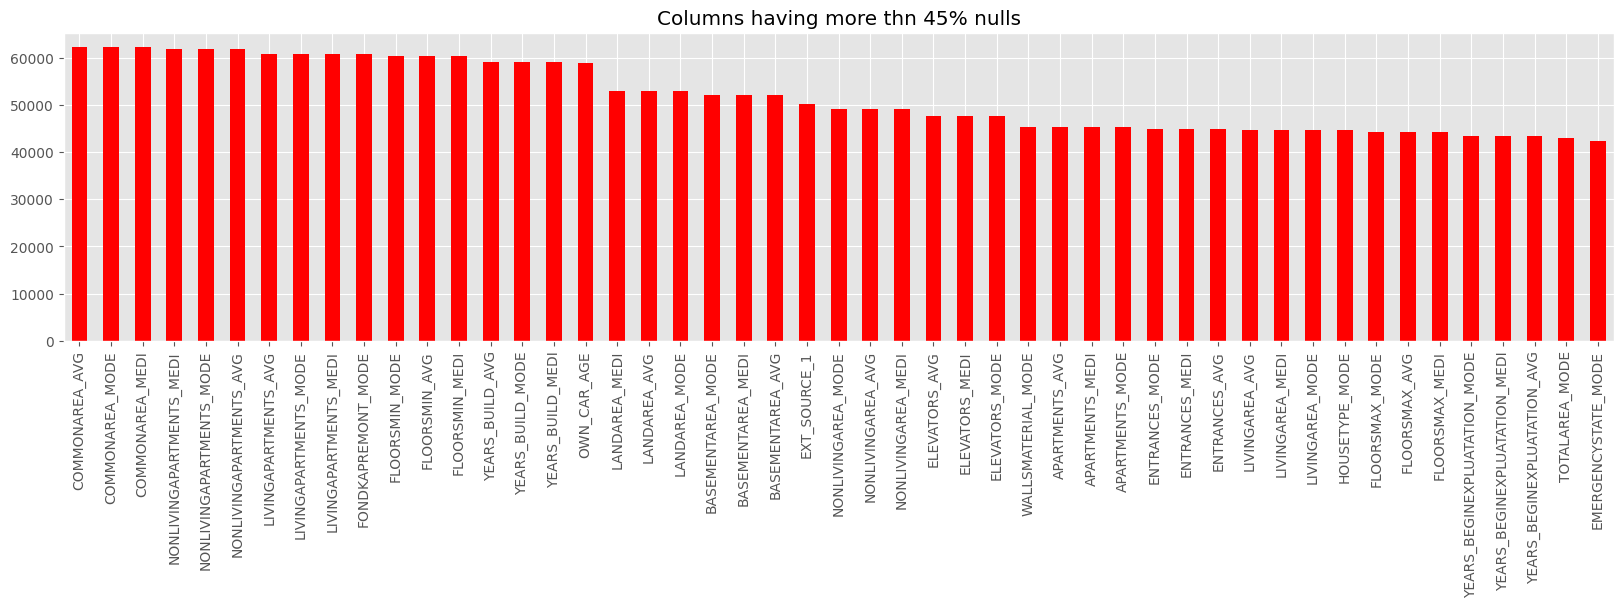

In [ ]:
plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="red")
plt.title('Columns having more thn 45% nulls')
plt.show()

##### Removal of columns with NULLs>45%

In [ ]:
a = (credit_data.isnull().sum()/len(credit_data))
list(a[a.values>=0.45].index)

# Function to remove the columns having percentage of null values > 45%
def remove_null_cols(data):
    perc=0.45
    # Deciding cut-off NULL % to be 45%
    df = data.copy()                                                      # Creating a copy of data
    shape_before = df.shape                                               # Storing the shape of data before removal of columns
    remove_cols = (df.isnull().sum()/len(df))                             # Calculating % of NULLs
    remove_cols = list(remove_cols[remove_cols.values>=perc].index)
    df.drop(labels = remove_cols, axis =1, inplace=True)                    # Dropping cols
    print("Number of Columns dropped\t: ",len(remove_cols))
    print("\nOld dataset rows,columns",shape_before,"\nNew dataset rows,columns",df.shape)
    return df

In [ ]:
# Removing cols with more than 45% nulls. Now we'll be using credit_data_1 for further analysis

credit_data_1 = remove_null_cols(credit_data)

Number of Columns dropped	:  49

Old dataset rows,columns (89237, 122) 
New dataset rows,columns (89237, 73)


In [ ]:
# Checking the % of null values for each column in new dataset

null_perc_1 = credit_data_1.isnull().sum()/len(credit_data_1)*100
null_perc_1.sort_values(ascending = False).head(60)

,0
OCCUPATION_TYPE,31.290
EXT_SOURCE_3,19.814
AMT_REQ_CREDIT_BUREAU_YEAR,13.407
AMT_REQ_CREDIT_BUREAU_QRT,13.407
AMT_REQ_CREDIT_BUREAU_HOUR,13.407
AMT_REQ_CREDIT_BUREAU_MON,13.407
AMT_REQ_CREDIT_BUREAU_WEEK,13.407
AMT_REQ_CREDIT_BUREAU_DAY,13.407
NAME_TYPE_SUITE,0.412
DEF_30_CNT_SOCIAL_CIRCLE,0.318


We have now verified that our modified dataframe "Credit_data_1" has no cols with more than 31% NULLs

### 1.3 Imputing Missing Data

The below listed columns can be categorized into a group of columns with similar significance as they all represent number of queries made to the Credit Bureau.

Upon further investigation, we'll see that all have mode as 0.
We can impute NULLs for all of these with value 0.

In the end it is also varified that there are 0 NULLs after imputation.

##### AMT_REQ_CREDIT_BUREAU_YEAR
##### AMT_REQ_CREDIT_BUREAU_MON
##### AMT_REQ_CREDIT_BUREAU_WEEK
##### AMT_REQ_CREDIT_BUREAU_DAY
##### AMT_REQ_CREDIT_BUREAU_HOUR
##### AMT_REQ_CREDIT_BUREAU_QRT?

In [ ]:
# Checking value counts for AMT_REQ_CREDIT_BUREAU_YEAR
credit_data_1.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

# We see that there are 71k 0s

,count
AMT_REQ_CREDIT_BUREAU_YEAR,
0.000,20978
1.000,18655
2.000,14397
3.000,9667
4.000,5911
5.000,3480
6.000,2037
7.000,1143
8.000,637


In [ ]:
# Similarly we can check for all.
# Instead we can use the mode function to check modes for all of these variables

print(credit_data_1.AMT_REQ_CREDIT_BUREAU_YEAR.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_MON.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_WEEK.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_DAY.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_HOUR.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_QRT.mode())

0   0.000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64
0   0.000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
0   0.000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64
0   0.000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
0   0.000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
0   0.000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


In [ ]:
credit_data_2 = credit_data_1.copy() # Making copy of our last data

##### Imputing NULLs with 0s

In [ ]:
# Imputing null with 0s

impute_list = ['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK',
               'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']

for i in impute_list:
        credit_data_2[i] = credit_data_1[i].fillna(0)


In [ ]:
null_perc_2 = credit_data_2.isnull().sum()/len(credit_data_2)*100
null_perc_2.sort_values(ascending = False).head(60)

,0
OCCUPATION_TYPE,31.290
EXT_SOURCE_3,19.814
NAME_TYPE_SUITE,0.412
OBS_30_CNT_SOCIAL_CIRCLE,0.318
OBS_60_CNT_SOCIAL_CIRCLE,0.318
DEF_30_CNT_SOCIAL_CIRCLE,0.318
DEF_60_CNT_SOCIAL_CIRCLE,0.318
EXT_SOURCE_2,0.222
AMT_GOODS_PRICE,0.086
AMT_ANNUITY,0.007


#### AMT_ANNUITY
Since AMT_ANNUITY is a continuous variable, unlike AMT_REQ_CREDIT_BUREAU_YEAR etc ( which could take only integer values),
it is better to impute this with the median value.

Another reason for chosing to go for Median instead of Mode is close value counts for top 2 values as we'll see below.

In [ ]:
credit_data_1['AMT_ANNUITY'].describe()

,AMT_ANNUITY
count,89231.000
mean,27066.819
std,14441.749
min,1980.000
25%,16456.500
50%,24903.000
75%,34587.000
max,258025.500


In [ ]:
# Checking value counts for AMT_ANNUITY

credit_data_1.AMT_ANNUITY.value_counts()

,count
AMT_ANNUITY,
9000.000,1859
13500.000,1589
6750.000,647
10125.000,582
37800.000,480
...,...
69579.000,1
63364.500,1
3163.500,1


We see that top 2 value counts are close to each other. Thus we can chose to go for Median imputation and not mode

In [ ]:
# median for AMT_ANNUITY

credit_data_1.AMT_ANNUITY.median()

24903.0

##### Imputing NULLs with Median

In [ ]:
credit_data_2['AMT_ANNUITY'] = credit_data_1['AMT_ANNUITY'].fillna(credit_data_1.AMT_ANNUITY.median())
credit_data_2['AMT_ANNUITY'].isnull().sum()

np.int64(0)

#### AMT_GOODS_PRICE
Similar to AMT_ANNUITY, imputing NULLs with Median for  AMT_GOODS_PRICE for similar reasons.

In [ ]:
# Checking value counts for AMT_GOODS_PRICE

credit_data_1.AMT_GOODS_PRICE.value_counts()

,count
AMT_GOODS_PRICE,
450000.000,7565
225000.000,7278
675000.000,7207
900000.000,4485
270000.000,3328
...,...
653350.500,1
381411.000,1
601389.000,1


In [ ]:
# median for AMT_GOODS_PRICE

credit_data_1.AMT_GOODS_PRICE.median()

450000.0

In [ ]:
# Imputing NULLs with Median

credit_data_2['AMT_GOODS_PRICE'] = credit_data_1['AMT_GOODS_PRICE'].fillna(credit_data_1.AMT_GOODS_PRICE.median())

In [ ]:
# Verifying count of NULLs to be 0

credit_data_2['AMT_GOODS_PRICE'].isnull().sum()

np.int64(0)

In [ ]:
(credit_data_2.isnull().sum()/len(credit_data_2)*100).sort_values(ascending = False)

,0
OCCUPATION_TYPE,31.290
EXT_SOURCE_3,19.814
NAME_TYPE_SUITE,0.412
OBS_30_CNT_SOCIAL_CIRCLE,0.318
OBS_60_CNT_SOCIAL_CIRCLE,0.318
DEF_30_CNT_SOCIAL_CIRCLE,0.318
DEF_60_CNT_SOCIAL_CIRCLE,0.318
EXT_SOURCE_2,0.222
DAYS_LAST_PHONE_CHANGE,0.002
FLAG_DOCUMENT_11,0.001


### 1.4 Fixing erroneous data
As seen already with the help of describe function, we know that we need to treat -ve values in days columns.

We can modify the values to be absolute values, assuming that -ve sign was a technical fault during data feed.

In [ ]:
# Confirming that all DAYS fields have -ve values

print(credit_data['DAYS_BIRTH'].unique())
print(credit_data['DAYS_EMPLOYED'].unique())
print(credit_data['DAYS_REGISTRATION'].unique())
print(credit_data['DAYS_ID_PUBLISH'].unique())
print(credit_data['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -9076 -24737  -8829]
[  -637  -1188   -225 ... -10967  -7833 -10165]
[ -3648.  -1186.  -4260. ... -13459. -11435. -12175.]
[-2120  -291 -2531 ... -5787 -5587 -5984]
[-1134.  -828.  -815. ... -2999. -3403. -3448.]


In [ ]:
# Preparing the list of columns to be treated

erroneous_cols = [cols for cols in credit_data_2.columns if cols.startswith('DAYS')]
erroneous_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [ ]:
# Changing the column values with Absolute values using abs function

credit_data_2[erroneous_cols]= abs(credit_data_2[erroneous_cols])

In [ ]:
# Verifying absence of -ve values in data

credit_data_2.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,89237.000,89237.000,89237.000,89237.000,89237.000,89237.000,89237.000,89237.000,89237.000,89237.000,...,89236.000,89236.000,89236.000,89236.000,89237.000,89237.000,89237.000,89237.000,89237.000,89237.000
mean,151752.083,0.081,0.417,169452.798,598795.345,27066.673,538028.289,0.021,16033.027,67305.105,...,0.008,0.001,0.000,0.000,0.006,0.006,0.029,0.233,0.230,1.639
std,29853.306,0.272,0.721,404531.515,401805.150,14441.274,369023.301,0.014,4369.487,139089.525,...,0.092,0.025,0.021,0.017,0.079,0.098,0.189,0.864,0.579,1.861
min,100002.000,0.000,0.000,25650.000,45000.000,1980.000,45000.000,0.001,7676.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,125967.000,0.000,0.000,112500.000,270000.000,16456.500,238500.000,0.010,12384.000,930.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,151689.000,0.000,0.000,144000.000,512446.500,24903.000,450000.000,0.019,15756.000,2208.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,177607.000,0.000,1.000,202500.000,808650.000,34587.000,679500.000,0.029,19676.000,5693.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000
max,203609.000,1.000,12.000,117000000.000,4050000.000,258025.500,4050000.000,0.073,25201.000,365243.000,...,1.000,1.000,1.000,1.000,3.000,6.000,8.000,24.000,8.000,25.000


We have confirmed that there are no -ve values anymore.

#### Replacing XNAs for CODE_GENDER
A quick look on the value counts for CODE_GENDER shows 4 counts of XNA which is equivalent of a NULL.

Since 4 is a relatively small count, it doesn't matter much on how we impute it. Imputing it with Mode F in our case.

In [ ]:
# CHecnking value counts for CODE_GENDER

credit_data_2.CODE_GENDER.value_counts()

,count
CODE_GENDER,
F,58776
M,30458
XNA,3


In [ ]:
# Replacing XNAs with F

credit_data_2.loc[credit_data_2.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
credit_data_2.CODE_GENDER.value_counts()

,count
CODE_GENDER,
F,58779
M,30458


#### Replacing XNAs for ORGANIZATION_TYPE
XNAs for ORGANIZATION_TYPE have 2nd highest count in the data.
We must be very careful in imputing such a high number of XNAs with any value.

Since it is a categorical variable, and there won't be any aggregrate functions performed on this data,
we don't necessarily need whole of the value to be imputed.

Thus, changing all XNAs with NULLs to protect the originality of data.

In [ ]:
# Checking value counts for ORGANIZATION_TYPE

credit_data_2.ORGANIZATION_TYPE.value_counts()

,count
ORGANIZATION_TYPE,
Business Entity Type 3,19722
XNA,15965
Self-employed,11078
Other,4833
Medicine,3279
Business Entity Type 2,3059
Government,3040
School,2611
Trade: type 7,2221


In [ ]:
# Replacing XNAs with Nulls

credit_data_2['ORGANIZATION_TYPE'] = credit_data_1['ORGANIZATION_TYPE'].replace('XNA',np.nan)

In [ ]:
# Checking value counts for credit_data_2

credit_data_2.ORGANIZATION_TYPE.value_counts()

,count
ORGANIZATION_TYPE,
Business Entity Type 3,19722
Self-employed,11078
Other,4833
Medicine,3279
Business Entity Type 2,3059
Government,3040
School,2611
Trade: type 7,2221
Kindergarten,1967


We have confirmed that there are no more XNAs now in this field.

In [ ]:
(credit_data_2.isnull().sum()/len(credit_data_2)*100).sort_values(ascending = False)

,0
OCCUPATION_TYPE,31.290
EXT_SOURCE_3,19.814
ORGANIZATION_TYPE,17.891
NAME_TYPE_SUITE,0.412
OBS_60_CNT_SOCIAL_CIRCLE,0.318
DEF_60_CNT_SOCIAL_CIRCLE,0.318
OBS_30_CNT_SOCIAL_CIRCLE,0.318
DEF_30_CNT_SOCIAL_CIRCLE,0.318
EXT_SOURCE_2,0.222
DAYS_LAST_PHONE_CHANGE,0.002


### 1.5 Adding new columns by Binning Continuous Variables
It is always a good practice to identify core or highly significant continuous fields in the data and then bin them into specific categories. It allows for an additional categorical analysis for such fields. We'll observe the use case of same later in this EDA exercise.
For now, let's bin some of the continuous variables into 5 bins each as below -

##### Binning AMT_INCOME_TOTAL

In [ ]:
# Note : New function pd.qcut

# Using pd.qcut function to bin AMT_INCOME_TOTAL into 5 categories

credit_data_2['AMT_INCOME_RANGE'] = pd.qcut(credit_data_2.AMT_INCOME_TOTAL,
                                            q=[0, 0.2, 0.5, 0.8, 0.95, 1],
                                            labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
credit_data_2['AMT_INCOME_RANGE'].head(7)

,AMT_INCOME_RANGE
0,MEDIUM
1,HIGH
2,VERY_LOW
3,LOW
4,LOW
5,VERY_LOW
6,MEDIUM


#### Binning DAYS_BIRTH

In [ ]:
# Binning DAYS_BIRTH into 5 categories

# Step 1 : Convert days into Years ( Age)
# Step 2 : Bin as per Age of Applicant


credit_data_2['DAYS_BIRTH']= (credit_data_2['DAYS_BIRTH']/365).astype(int)
credit_data_2['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69])

In [ ]:
# Using pd.qcut function to bin DAYS_BIRTH into 5 categories

credit_data_2['DAYS_BIRTH_BINS']=pd.cut(credit_data_2['DAYS_BIRTH'],
                                      bins=[19,25,35,60,100],
                                      labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [ ]:
# Checking value counts for DAYS_BIRTH_BINS

credit_data_2['DAYS_BIRTH_BINS'].value_counts()

,count
DAYS_BIRTH_BINS,
Middle_Age,53795
Young,22081
Senior_Citizen,8580
Very_Young,4781


### 1.6 Splitting data based on TARGET
Splitting data into 2 subsets based on Target Variable- Defaulter Data and Non-Defaulter Data.

This will help us with the comparison among 2 groups later

In [ ]:
# SPlitting data as per TARGET into deafulter and non-defaulter datasets

defaulter = credit_data_2[credit_data_2.TARGET==1]
non_defaulter =  credit_data_2[credit_data_2.TARGET==0]

In [ ]:
# Checking row counts of data split as per TARGET

print(" Defaulter data shape - " + str(defaulter.shape) )
print(" Non-Defaulter data shape - " + str(non_defaulter.shape) )

 Defaulter data shape - (7202, 75)
 Non-Defaulter data shape - (82035, 75)


In [ ]:
# Checking % of data split as per TARGET

print(" Defaulter data % - " + str(round(defaulter.shape[0]*100/credit_data_2.shape[0],2) ))
print(" Non-Defaulter data % - " + str(round(non_defaulter.shape[0]*100/credit_data_2.shape[0],2) ))

 Defaulter data % - 8.07
 Non-Defaulter data % - 91.93


## 2. Univariate Analysis
Univariate Analysis is simplest form of analysing data. It restricts the analysis to only 1 variable as the name states.
( Uni means One )

It doesn't take into account the mutual relationships and associations among variables. Rather it focuses on
finding patterns through a particular field.

In [ ]:
len(credit_data_2.columns)

75

##### Occupation Type

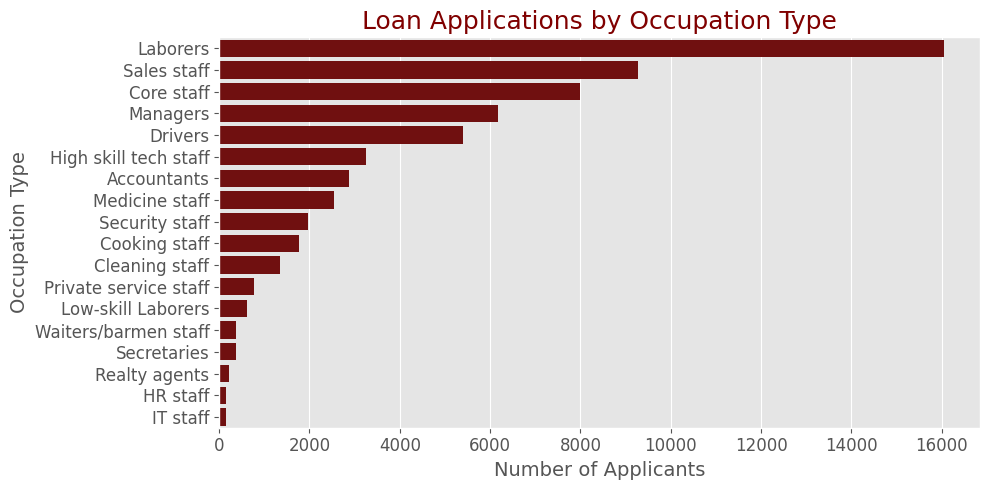

In [ ]:
plt.figure(figsize=(10,5))

temp = credit_data_2["OCCUPATION_TYPE"].value_counts()
sns.barplot(y=temp.index, x=temp.values, color='maroon')

plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Loan Applications by Occupation Type', size=18, color='maroon')
plt.xlabel('Number of Applicants', size=14)
plt.ylabel('Occupation Type', size=14)

plt.tight_layout()
plt.show()


We can infer that most of the applications come for Labourers, Sales Staff and Core Staff.

Organization Type

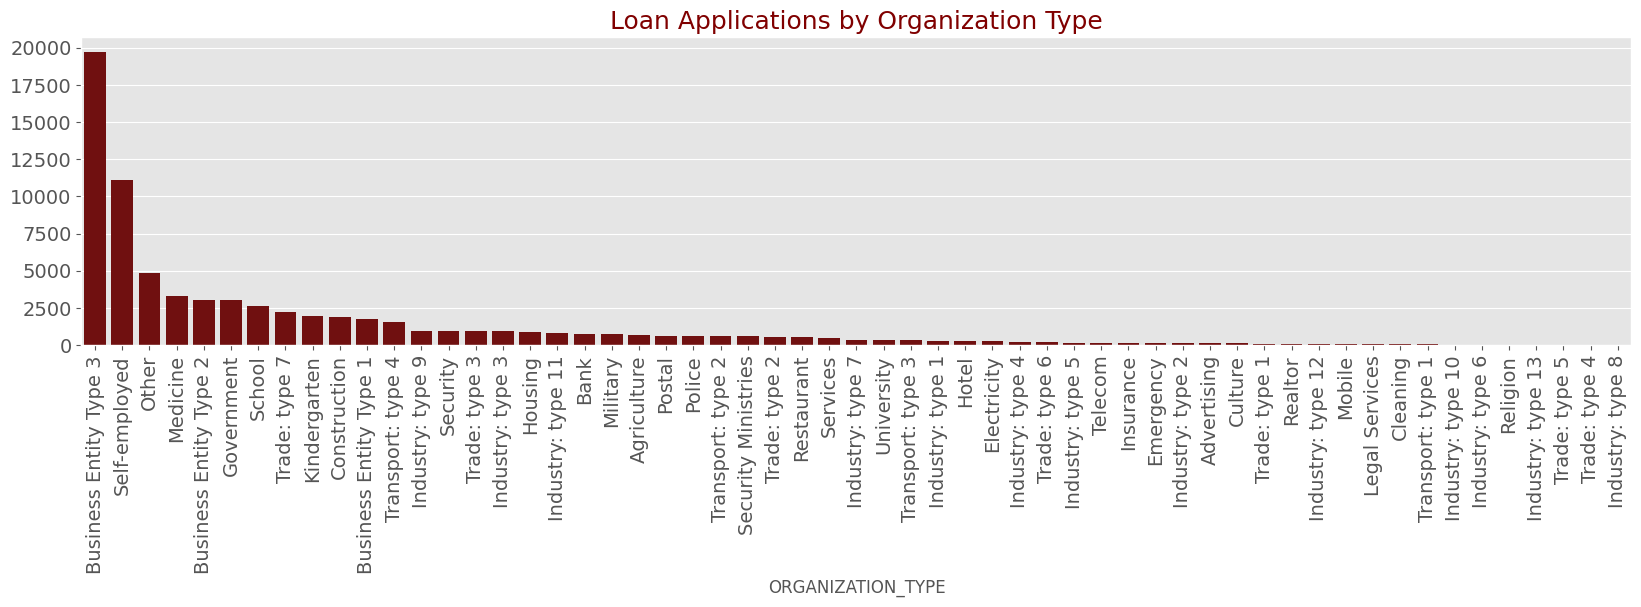

In [ ]:
# Distribution of 'Organization Type'
plt.figure(figsize=(20,4))
temp = credit_data_2["ORGANIZATION_TYPE"].value_counts()
sns.barplot(x=temp.index, y = temp.values, color = 'maroon')
plt.xticks(rotation=90, size = 14)
plt.yticks( size = 14)
plt.title('Loan Applications by Organization Type', size=18,color = 'maroon')
plt.show()

It is observed that majority of the applicants belong to Business Entity Type 3 and Self Employed.

##### Comparison of Gender Distribution among Defaulters and Non Defaulters

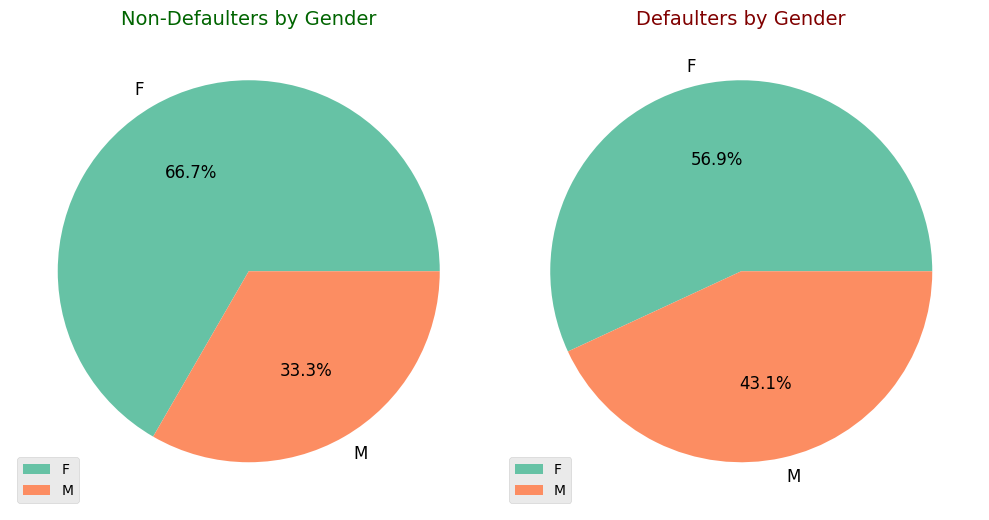

In [ ]:
## 📊 Gender Distribution: Defaulters vs Non-Defaulters

colors = sns.color_palette('Set2')  # Softer color palette for visual clarity

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))  # Wider figure

# 🎯 Non-Defaulters
data = non_defaulter['CODE_GENDER'].value_counts()
data_df = pd.DataFrame({'labels': data.index, 'values': data.values})
axes[0].pie(data_df['values'],
            labels=data_df['labels'],
            colors=colors,
            autopct='%0.1f%%',
            textprops={'fontsize': 12})
axes[0].set_title('Non-Defaulters by Gender', size=14, color='darkgreen')
axes[0].legend(loc='lower left')

# 🎯 Defaulters
data = defaulter['CODE_GENDER'].value_counts()
data_df = pd.DataFrame({'labels': data.index, 'values': data.values})
axes[1].pie(data_df['values'],
            labels=data_df['labels'],
            colors=colors,
            autopct='%0.1f%%',
            textprops={'fontsize': 12})
axes[1].set_title('Defaulters by Gender', size=14, color='maroon')
axes[1].legend(loc='lower left')

plt.tight_layout()
plt.show()


Insights -

🧠 Gender-wise Defaulting Behavior – Insights:
✅ Majority of loan applicants are Female (66.6% among non-defaulters).

🔁 However, the proportion of Male defaulters is higher than their proportion among non-defaulters.

Males make up 33.4% of non-defaulters but 42.9% of defaulters.

📌 This suggests that Male applicants are slightly more likely to default compared to Females in this dataset.

### Converting into function

In [ ]:
def univariate_comparison(col):
    """
    Shows pie chart comparison of a column for defaulters vs non-defaulters,
    excluding any categories with 0% share.

    Usage: univariate_comparison('NAME_INCOME_TYPE')
    """

    colors = sns.color_palette('Set2')[:10]  # Extended color palette

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Non-defaulters
    counts_nd = non_defaulter[col].value_counts()
    counts_nd = counts_nd[counts_nd > 0]  # remove 0-count categories
    axes[0].pie(counts_nd.values,
                labels=counts_nd.index,
                colors=colors[:len(counts_nd)],
                autopct='%0.1f%%',
                textprops={'fontsize': 12})
    axes[0].set_title(f'Non-Defaulters by {col}', fontsize=14, color='green')
    axes[0].legend(loc='best')

    # Defaulters
    counts_d = defaulter[col].value_counts()
    counts_d = counts_d[counts_d > 0]  # remove 0-count categories
    axes[1].pie(counts_d.values,
                labels=counts_d.index,
                colors=colors[:len(counts_d)],
                autopct='%0.1f%%',
                textprops={'fontsize': 12})
    axes[1].set_title(f'Defaulters by {col}', fontsize=14, color='darkred')
    axes[1].legend(loc='best')

    plt.tight_layout()
    plt.show()


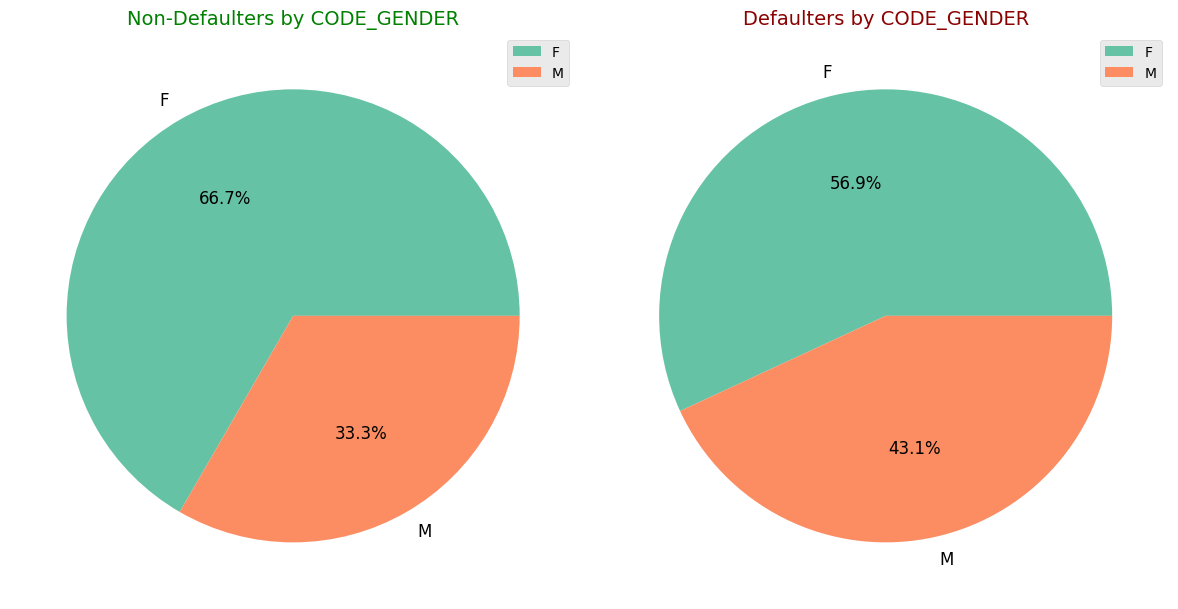

In [ ]:
univariate_comparison('CODE_GENDER')

Insights:

Men have a higher tendency to default on loans — although they form only 33.4% of non-defaulters, their share rises to 42.9% among defaulters, indicating a disproportionately higher default rate compared to women.

##### Comparison of Income Type Distribution among Defaulters and Non Defaulters

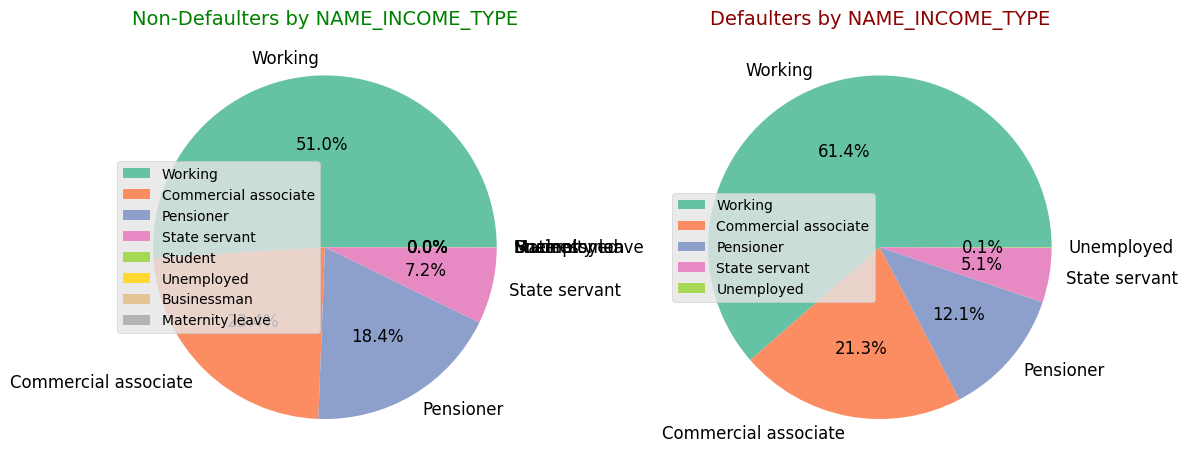

In [ ]:
# Comparison of Income Type Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_INCOME_TYPE')

Insights -
* Almost half of the Loan applications come from Working professionals.
* Working professionals contribute more than expected to loan defaults. The % split has increased from 51% to 61%

##### Comparison of Family Status Distribution among Defaulters and Non Defaulters

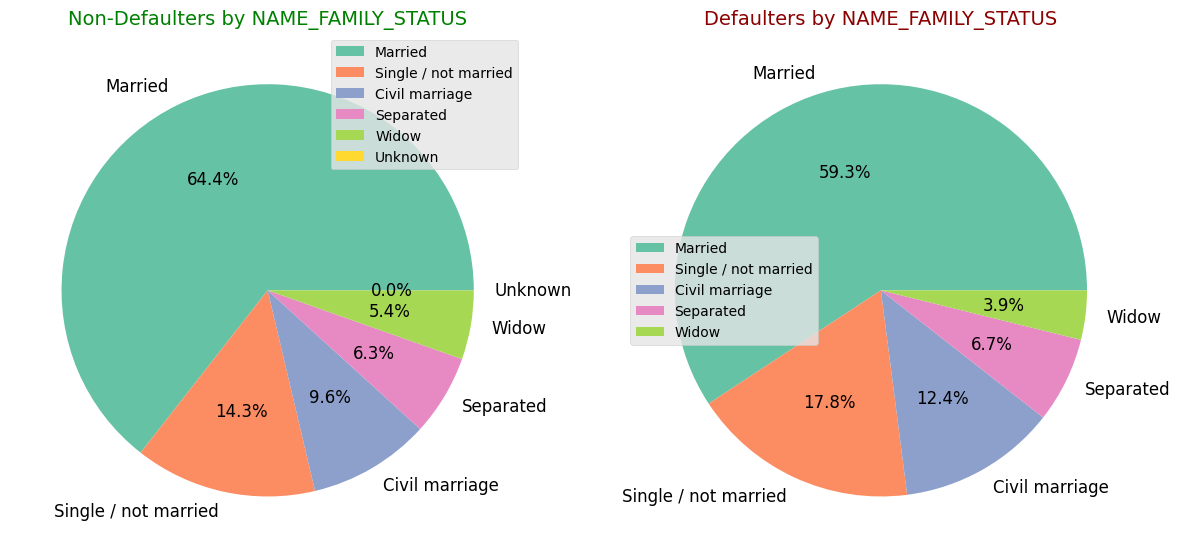

In [ ]:
# Comparison of Family Status Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_FAMILY_STATUS')

Insights-
* 65 % of the Loan applicants are married.
* Family status doesn't seem to have any major impact on Loan deafults.

##### Comparison of Education Type Distribution among Defaulters and Non Defaulters

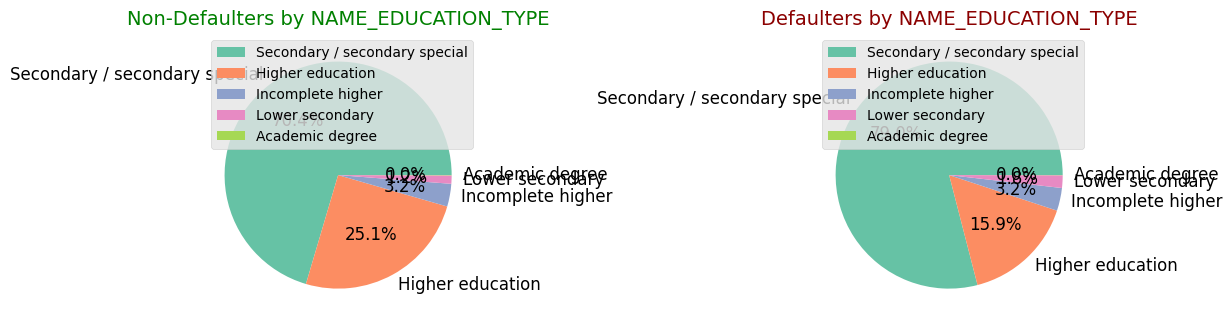

In [ ]:
# Comparison of Education Type Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_EDUCATION_TYPE')

Insights-
* More than 2/3rds of Loan applicants have highest education as Secondary.
* Secondary Education class contribute majorly ( more than expected too) for loan defaults.
* There is a considerable decrease in % split for loan defaults by people with higher education. ( from 25% to 16%)

##### Comparison of Housing Type Distribution among Defaulters and Non Defaulters

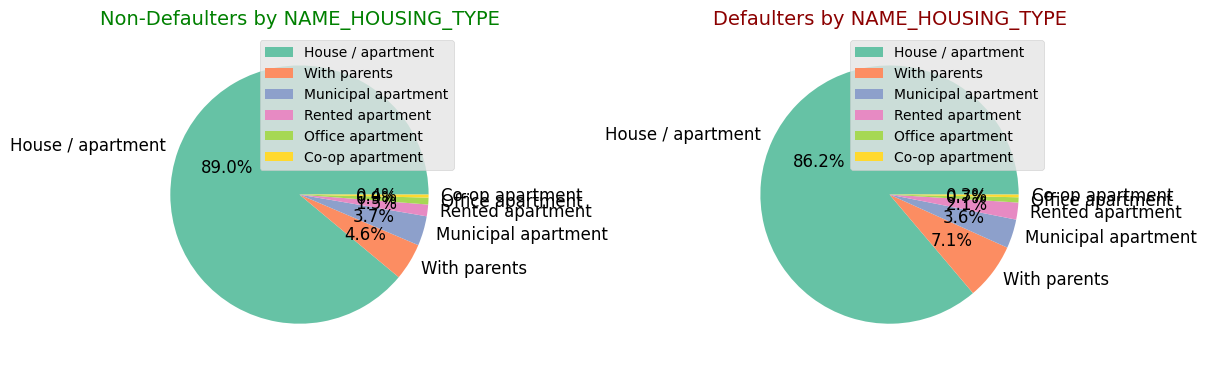

In [ ]:
# Comparison of Housig Type Distribution among Defaulters and Non Defaulters


univariate_comparison('NAME_HOUSING_TYPE')

Insights-
* Almost 90% of Loan applicants have their own home.
* Housing type doesn't play a significant role in determining whether there will be a loan defaulter.

##### Comparison of Income Range Distribution among Defaulters and Non Defaulters

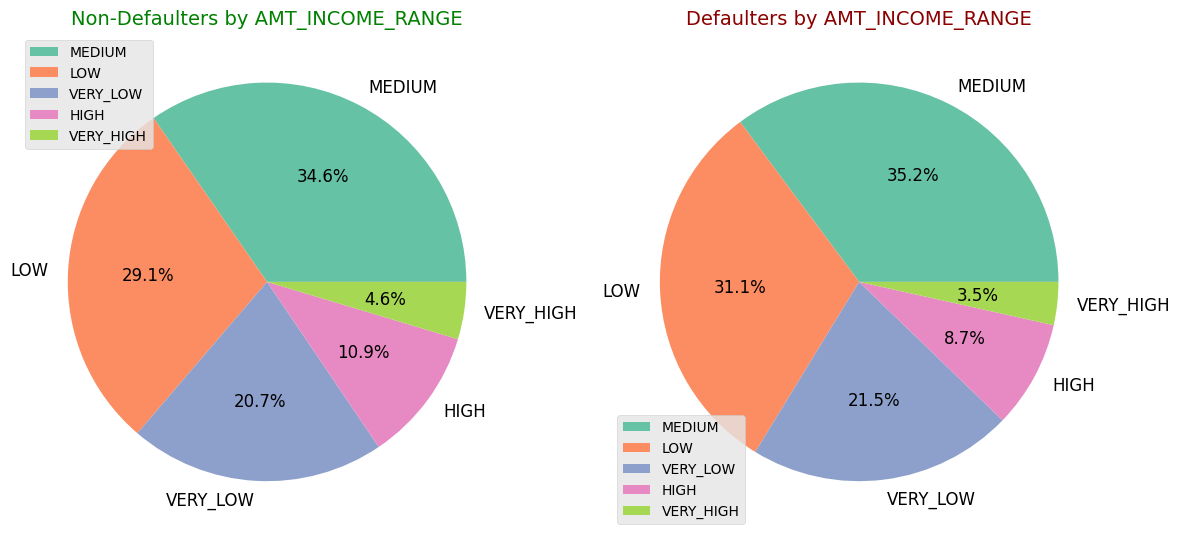

In [ ]:
# Comparison of Income Range Distribution among Defaulters and Non Defaulters

univariate_comparison('AMT_INCOME_RANGE')

Insights-
* Here also, the % split is more or less unchanged for Defaulters. It suggests that Income doesn't play a significant role in loan defaults. Although, further drilldown analysis ( later done in this notebook ) would tell us a different story.

##### Comparison of Age Distribution among Defaulters and Non Defaulters

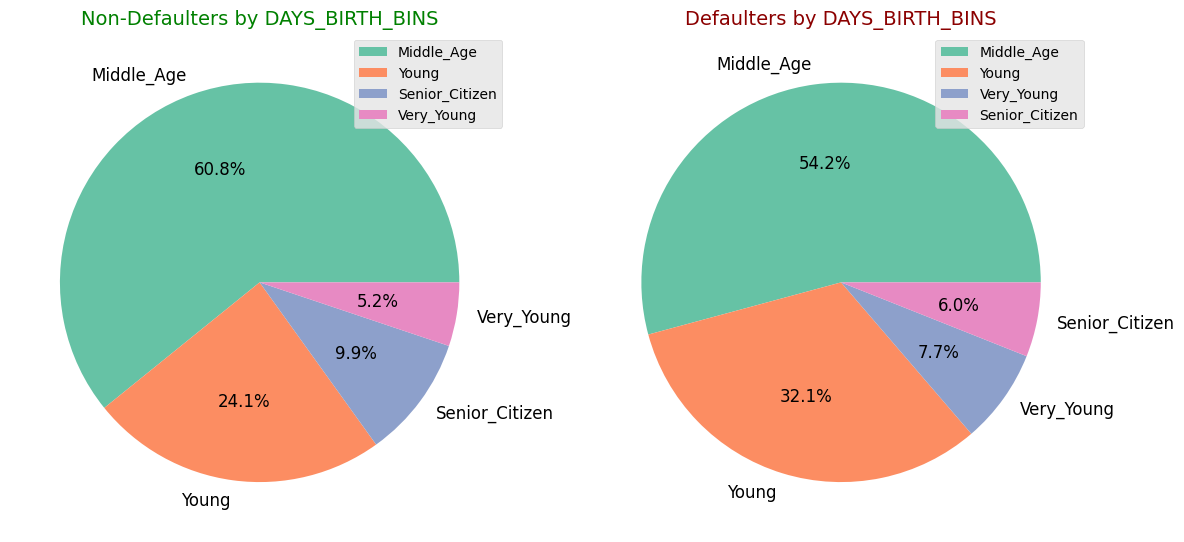

In [ ]:
# Comparison of Age Distribution among Defaulters and Non Defaulters

univariate_comparison('DAYS_BIRTH_BINS')

Insights -
* There is a significant shift in % split for Middle Age and Young applicants.
* Middle Aged applicants are contributing lesser to loan defaults
* Young applicants are more expected to default on a loan since there is a change in % aplit from 24% to 32%

##### Comparison of Loan Type Distribution among Defaulters and Non Defaulters

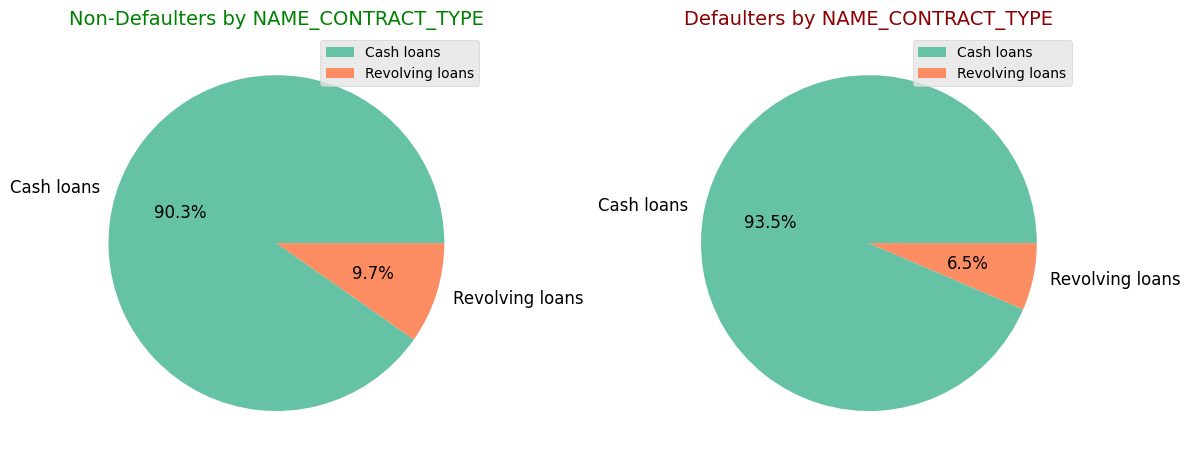

In [ ]:
# Comparison of Loan Type Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_CONTRACT_TYPE')

Insights-
* Cash loans are slightly more likely to be defaulted than revolving loans.

##### Comparison of Accompany Type Distribution among Defaulters and Non Defaulters

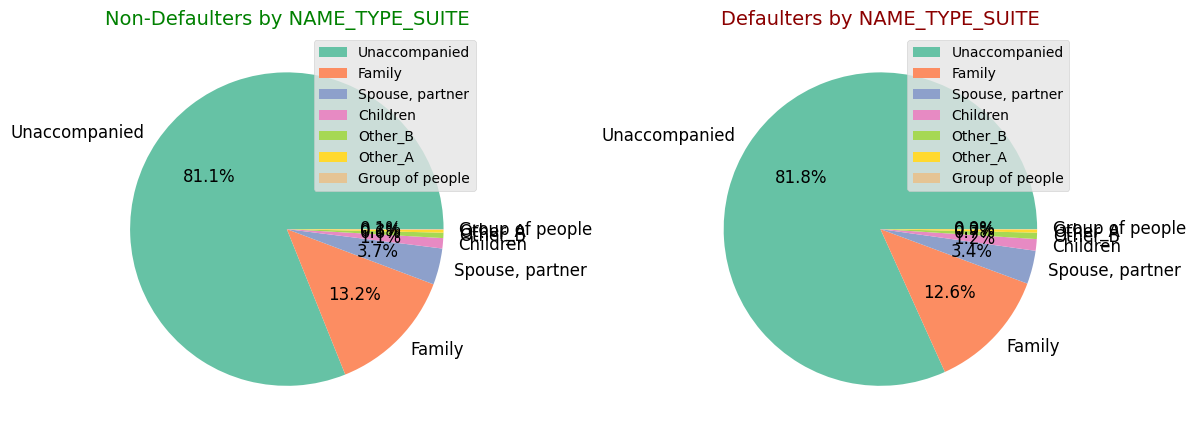

In [ ]:
# Comparison of Accompany Type Distribution among Defaulters and Non Defaulters

univariate_comparison('NAME_TYPE_SUITE')

 Insights-
* Majority of loans are applied by single occupants
* This parameter doesn't have any impact on loan defaults as the % split is unchanged in both cases.

### Univariate Analysis of Quantitative Variables

In [ ]:
# Defining function for Univariate Analysis of Quantitative Variables

def univariate_comparison_quant(col,hue=None):

    fig, axes=plt.subplots(nrows =2,ncols=2,figsize=(20,12))                      # Defining 4 subplots, changing fig size
    axes[0,0].set_title("Displot (Non-Defaulter) for  " + col )                   # Chart titl for Subplot 1
    sns.distplot(non_defaulter[~non_defaulter[col].isna()][col],ax=axes[0,0], color="#4CB391") # Distplot in subplot 1


    axes[0,1].set_title("Displot (Defaulter) for  " + col )                       #  Title for Subplot 2
    sns.distplot(defaulter[~defaulter[col].isna()][col],ax=axes[0,1], color="#4CB391") # Displot in Subplot 2

    axes[1,0].set_title("Boxplot (Non-Defaulter) for  " + col )                   # Title for Subplot 3
    sns.boxplot(non_defaulter[~non_defaulter[col].isna()][col],ax=axes[1,0], color="#4CB391") # Boxplot in subplot 3

    axes[1,1].set_title("Boxplot (Defaulter) for  " + col )                       # Title for Subplot 4
    sns.boxplot(defaulter[~defaulter[col].isna()][col],ax=axes[1,1], orient='h',color="#4CB391") # Boxplot in Subplot 4

    plt.tight_layout()
    plt.show()


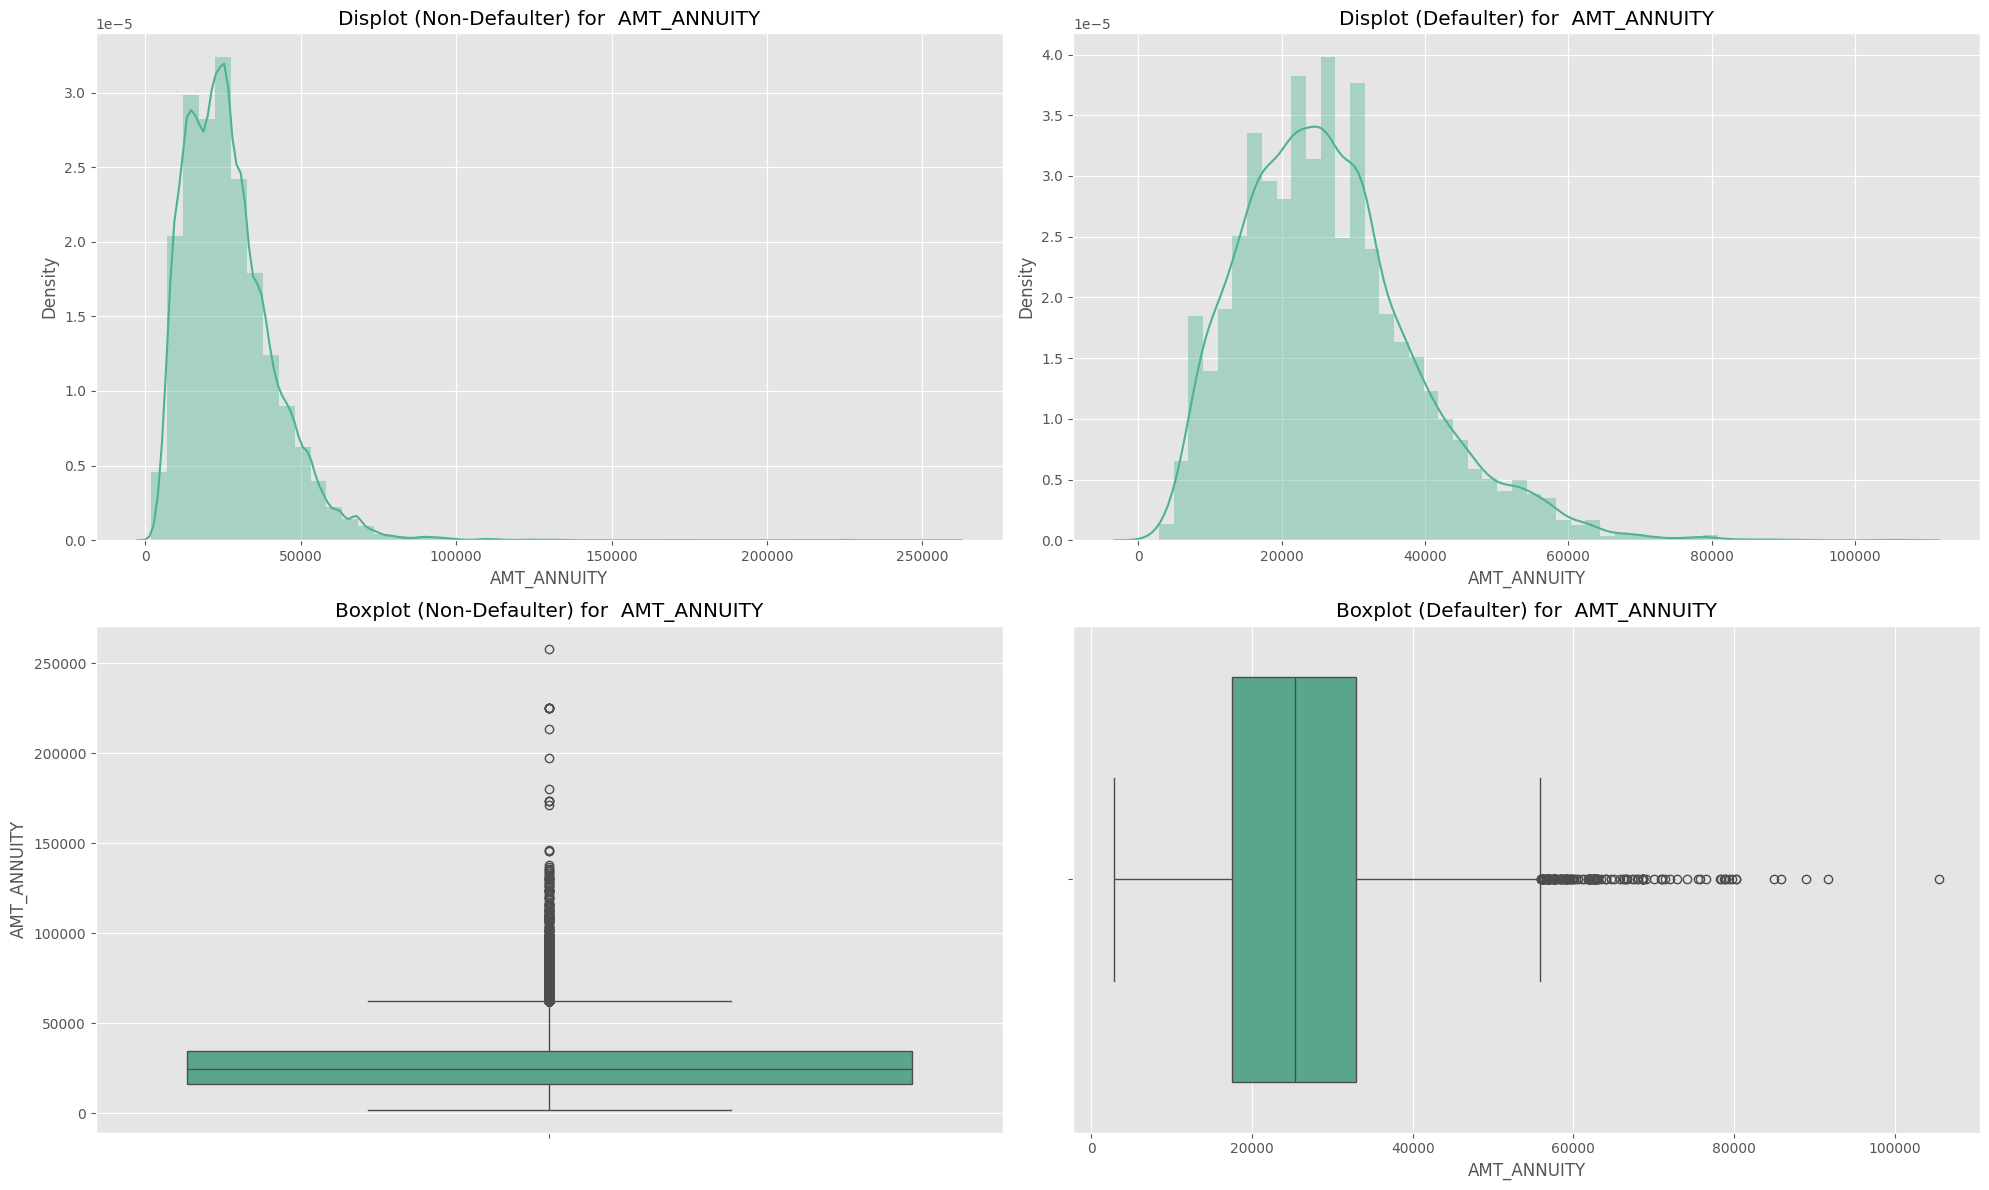

In [ ]:
# Univariate Analysis for Annuity Amount

univariate_comparison_quant('AMT_ANNUITY')

Insights -
* Applicants with lower Annuity Amount are slightly more likely to default on a loan.
* Majority of Loan applicants come from 1st quartile of Annuity data ( Low salary people )
Most people pay small EMIs, but defaulters tend to have slightly more extreme EMI amounts, which may indicate loan burden is a risk factor.

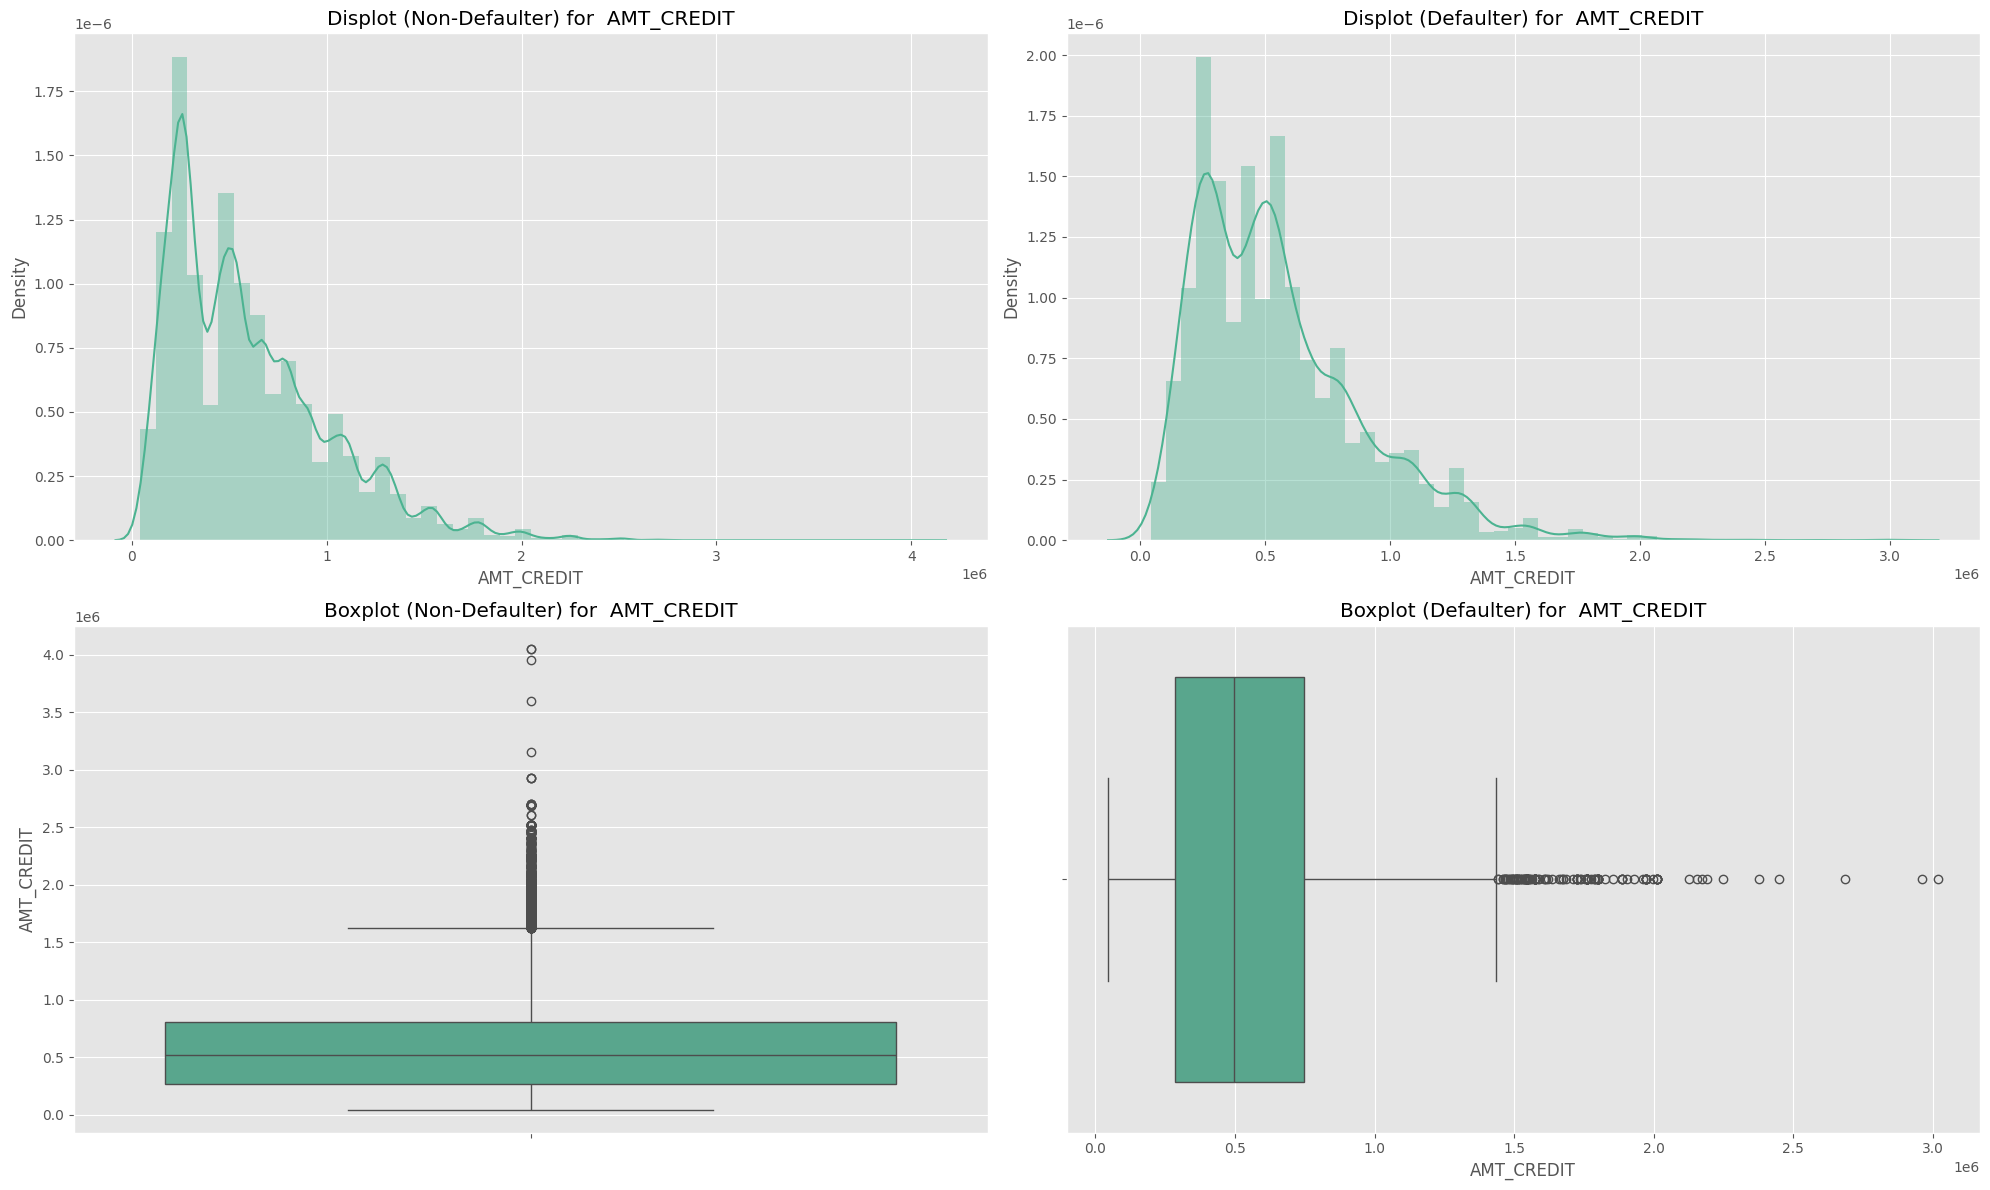

In [ ]:
# Univariate Analysis for Loan Amount

univariate_comparison_quant('AMT_CREDIT')

Insights-
* Loan Amount doesn't seem to have any correlation with Loan defaults.

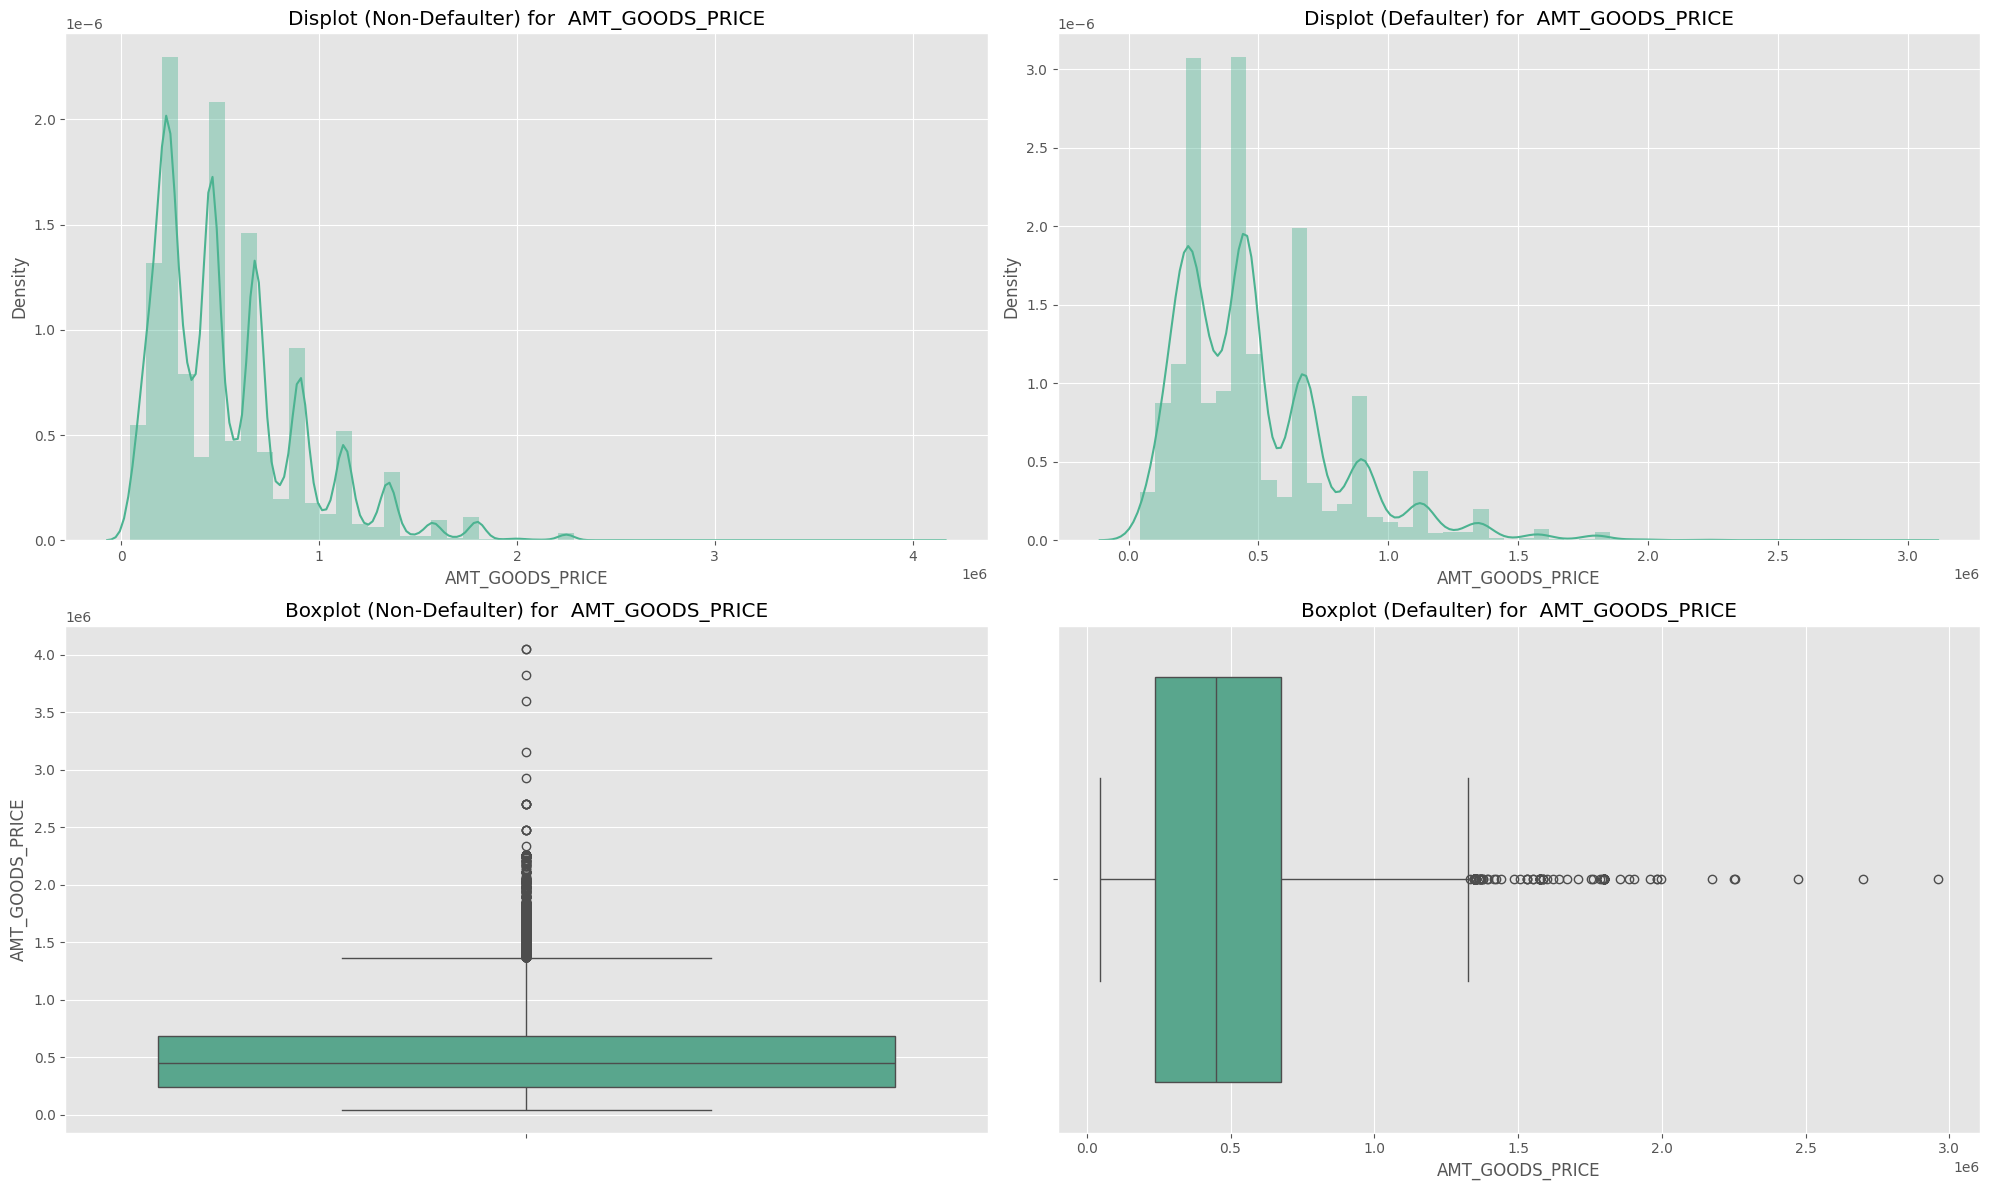

In [ ]:
# Univariate Analysis for Goods Price Amount

univariate_comparison_quant(col='AMT_GOODS_PRICE')

Insights-
* The distribution are almost unchanged for Defaulters and Non Defaulters, hence we can say that Goods Price doesn't impact the chance of a loan default.

## 3. Bivariate & Multivariate Analysis

Bivariate Analysis -

It is one of the simplest form of statistical analysis where 2 variables are involved. It looks for relationship among the 2 variables.
The applications involve hypothesis validation of association among variables, finding trends, regression etc.

Multivariate Analysis-

When more than 2 variable are involved in an analysis, it will be a multi-variate analysis. The additional variables may take form of hue color, 3rd axis etc.

In [ ]:
# Function for Multivariate analysis

def multivariate(col1,col2,col3):                                            # Takes 3 columns as inputs

    fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,12))

    axes[0].set_title("Boxplot (Non-Defaulter) for  "  )
    _=sns.boxplot(data=non_defaulter,x=col1, y=col2,palette = 'rainbow', hue= col3,ax=axes[0])
    _=axes[0].set_title('Loan Amount by  ' + col2 + ' & ' + col3 + ' (Non-Defaulter)', size=15,color = 'blue')

    axes[1].set_title("Boxplot (Defaulter) for  "  )
    _=sns.boxplot(data=defaulter,x=col1, y=col2,palette = 'rainbow', hue= col3,ax=axes[1])
    _=axes[1].set_title('Loan Amount by  ' + col2 + ' & ' + col3 + ' (Defaulter)', size=15,color = 'blue')
    plt.tight_layout()
    plt.show()


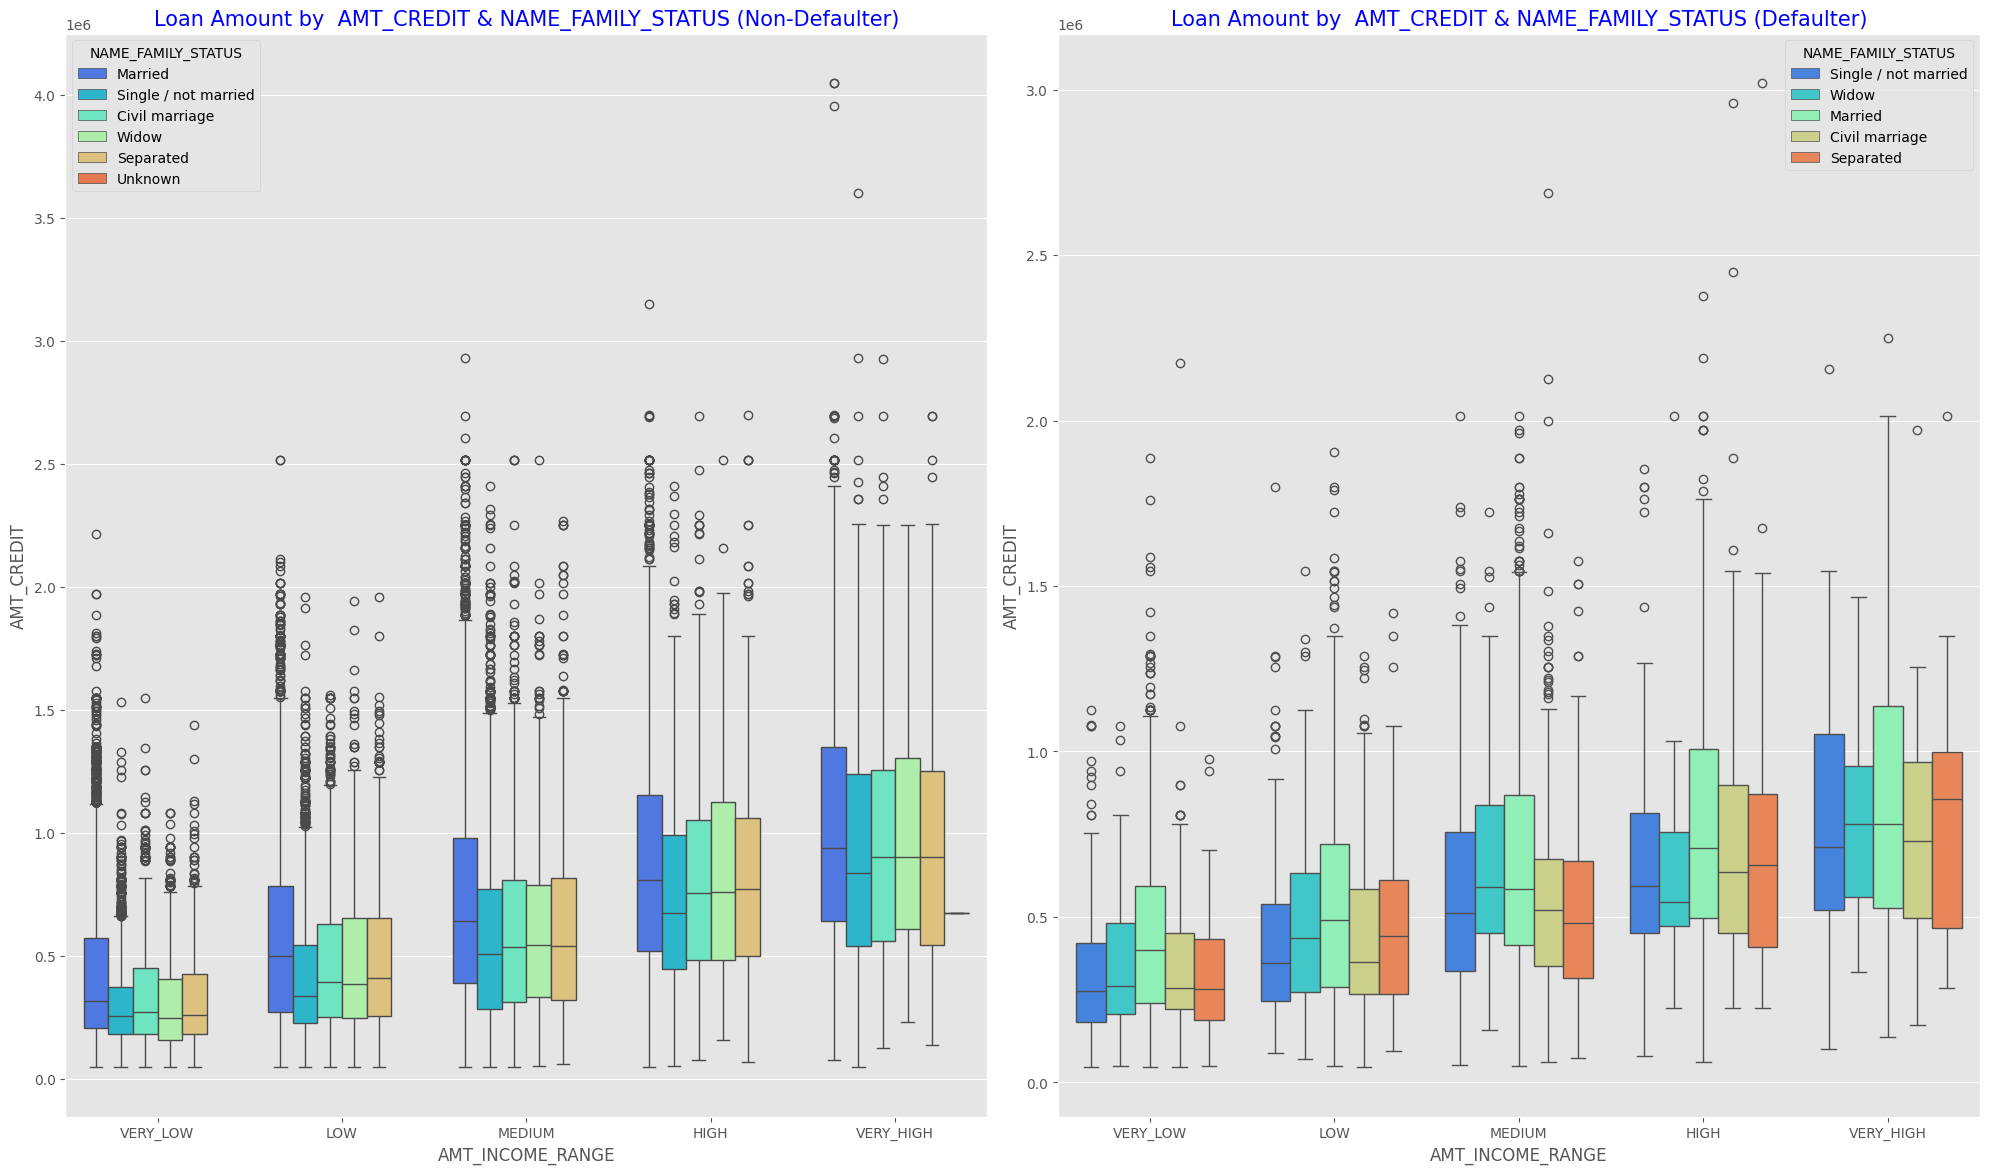

In [ ]:
# Analysis of AMT_INCOME_RANGE, AMT_CREDIT & NAME_FAMILY_STATUS

multivariate('AMT_INCOME_RANGE','AMT_CREDIT','NAME_FAMILY_STATUS')

Insights-
* With increase in Income range, the loan amount increases proportionally.
* On family status axis, we observe that Married applicants have higher loan amount than others.

The boxplots illustrate how loan amounts (AMT_CREDIT) vary across different income ranges (AMT_INCOME_RANGE) and family statuses (NAME_FAMILY_STATUS) for both non-defaulters and defaulters. As income increases from Very Low to Very High, the median loan amount generally rises, indicating a positive correlation between income and credit amount. Among all income groups, married and civil marriage applicants consistently take higher loans, while widows tend to borrow less. The defaulter group shows a wider spread and more outliers, suggesting higher loan variability and risk. Overall, income and marital status together influence the loan behavior significantly in both defaulter and non-defaulter segments.

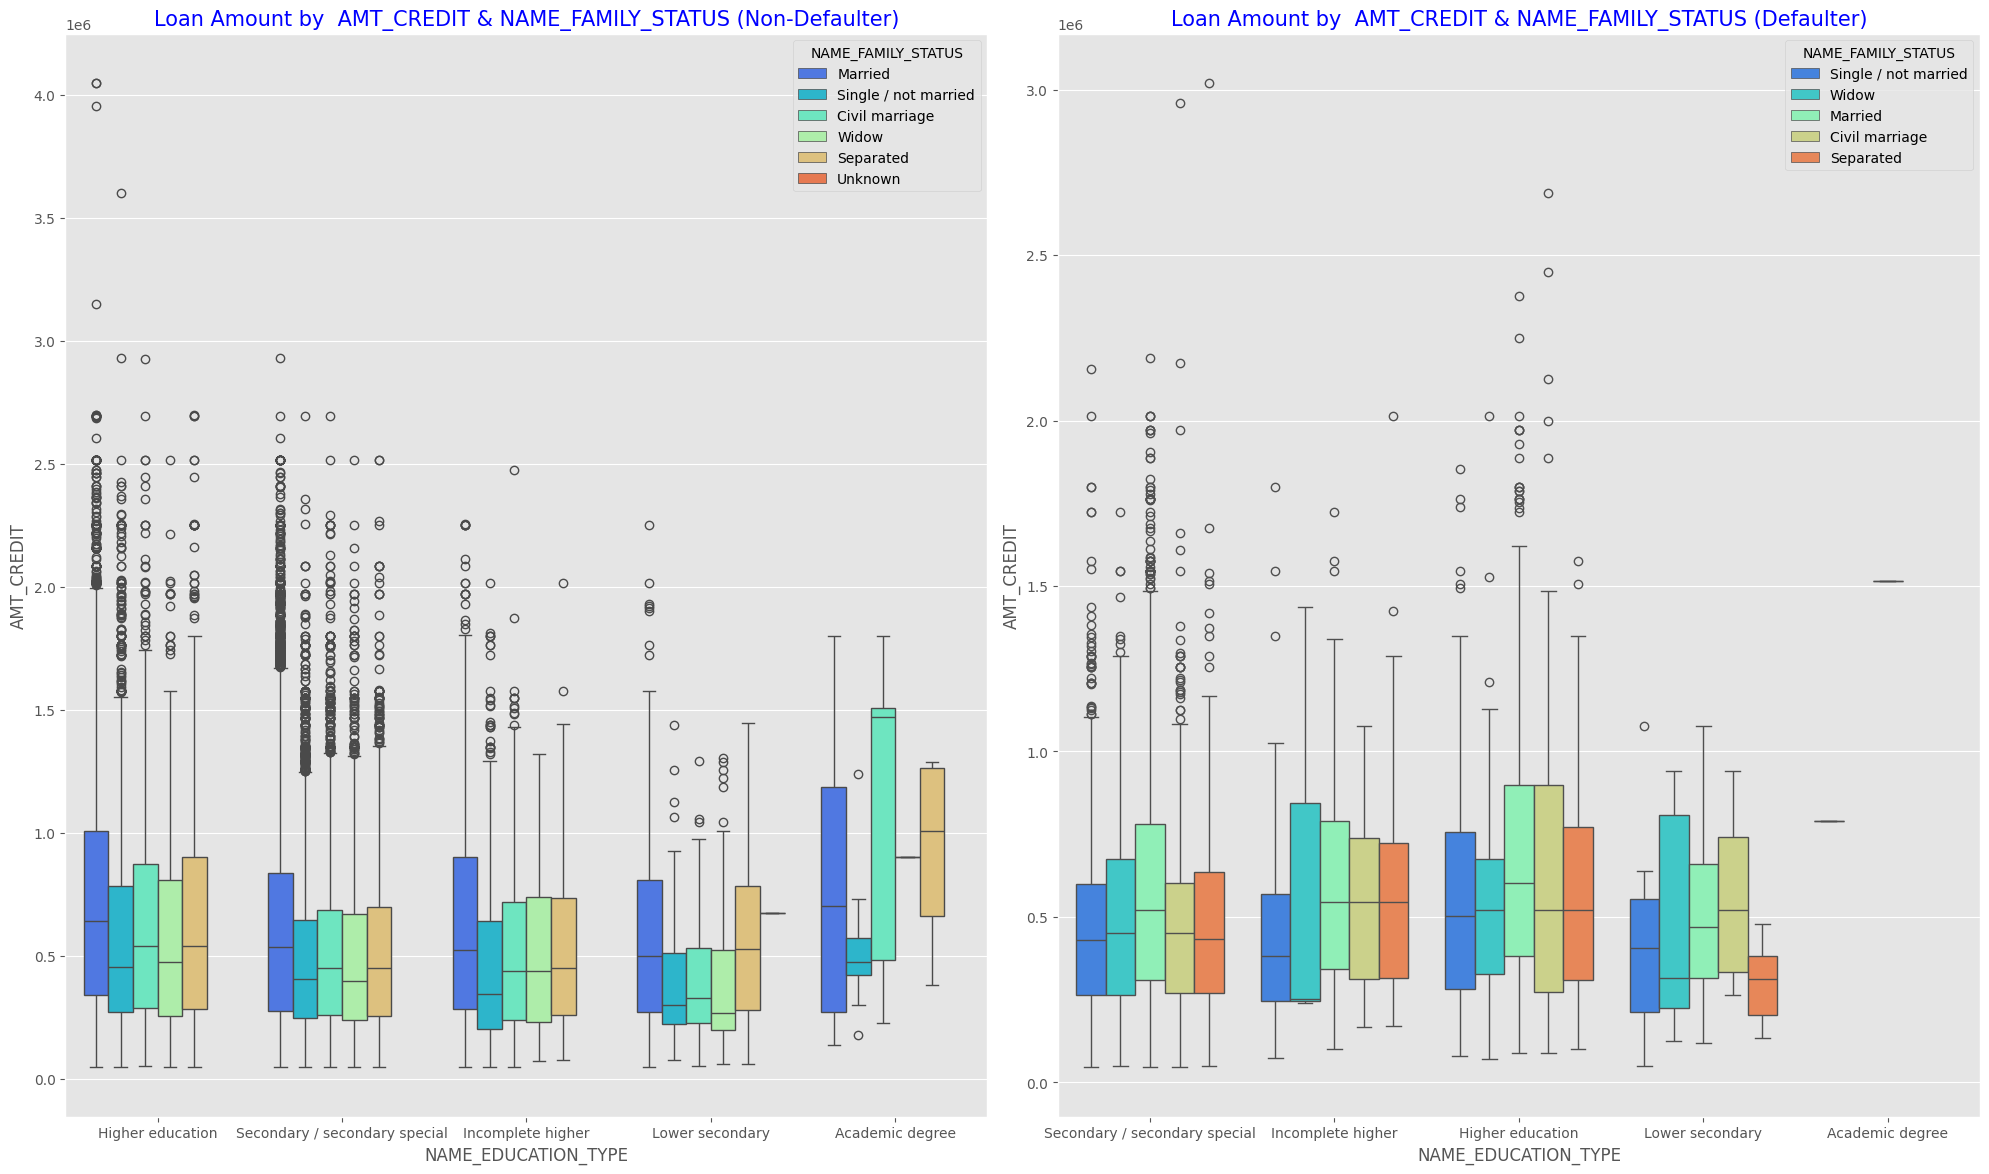

In [ ]:
# Analysis of NAME_EDUCATION_TYPE, AMT_CREDIT & NAME_FAMILY_STATUS

multivariate('NAME_EDUCATION_TYPE','AMT_CREDIT','NAME_FAMILY_STATUS')

Insights-


Education level and family status clearly influence loan size — with higher education and being married associated with larger credit amounts. However, this trend persists across both defaulters and non-defaulters, suggesting these features alone may not explain default behavior, but are useful in profiling.


From the multivariate analysis of AMT_CREDIT, NAME_EDUCATION_TYPE, and NAME_FAMILY_STATUS, we observe that applicants with higher education (like university degrees or academic credentials) tend to take higher loan amounts but have a lower proportion of defaults, suggesting that education may play a stabilizing role in financial behavior.

#### Drilldown Analysis
Here we'll look for % defaulters within different classes in a particular variable.

In [ ]:
# Defining function for drilldown analysis

def perc_defaulters(col):

    fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(10,7))

    total = credit_data_2[[col,'TARGET']].groupby(col).count()
    defaulter_1 = defaulter[[col,'TARGET']].groupby(col).count()
    perc = defaulter_1*100/total

    axes[0].set_title("Application Counts by  "+ col  )
    _=sns.barplot(x=total.index,y=total.TARGET,color='grey',order=total.sort_values('TARGET',ascending=False).index,ax=axes[0])
    _=axes[0].set_xticklabels(total.sort_values('TARGET',ascending=False).index,rotation=60, ha='right')

    axes[1].set_title("Defaulter % by " + col  )
    _=sns.barplot(x=perc.index,y=perc.TARGET,color='#ff597d',order=perc.sort_values('TARGET',ascending=False).index,ax=axes[1])
    _=axes[1].set_xticklabels(perc.sort_values('TARGET',ascending=False).index,rotation=60, ha='right')

    plt.tight_layout()
    plt.show()

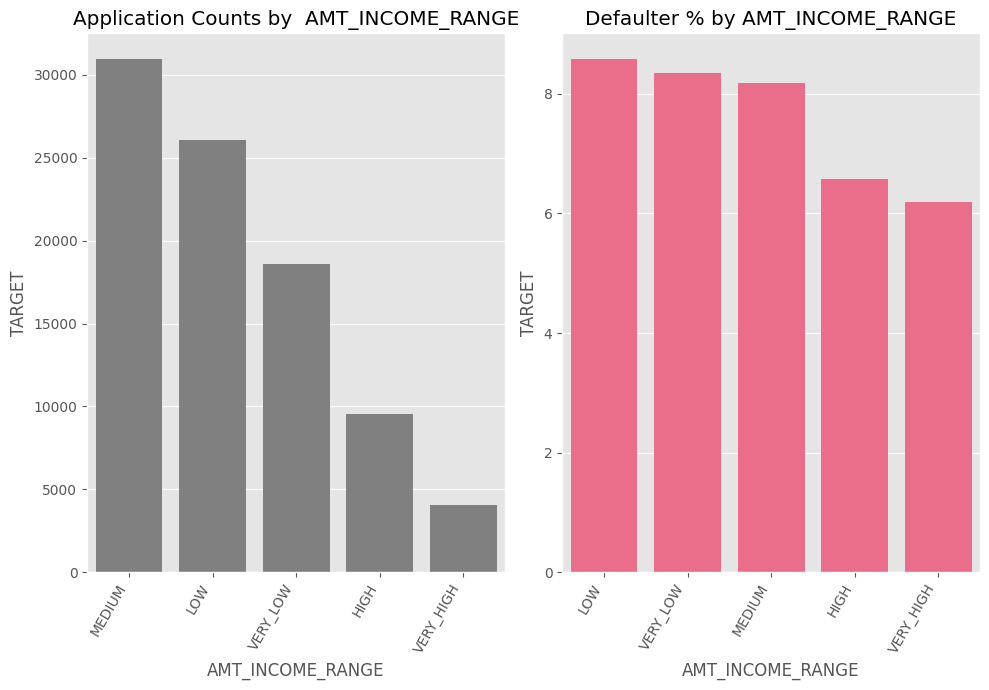

In [ ]:
# Drilldown analysis of AMT_INCOME_RANGE

perc_defaulters('AMT_INCOME_RANGE')

Insights-
* Median income range professionals have maximum applications in the data
* Low Income range have maximum % of loan defaults
* As the Income range increases, loan default probability decreases

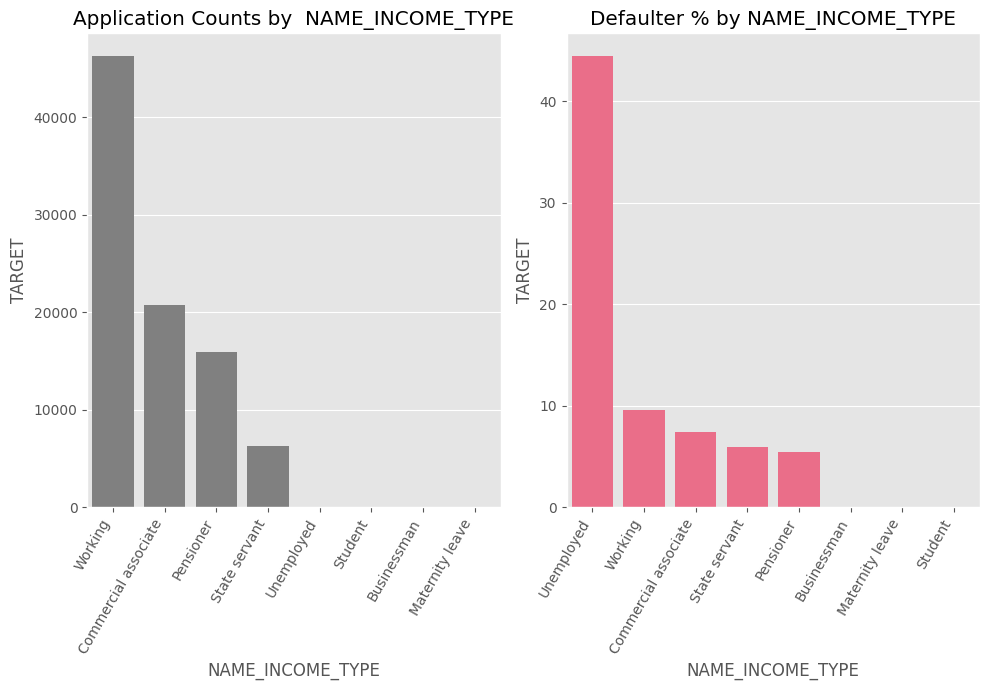

In [ ]:
# Drilldown analysis of NAME_INCOME_TYPE

perc_defaulters('NAME_INCOME_TYPE')

Insights-
* Applicants on Maternity leave have a whopping 40% loan default rate
* The second to the list are Unemployed applicants with 35% loan defaults

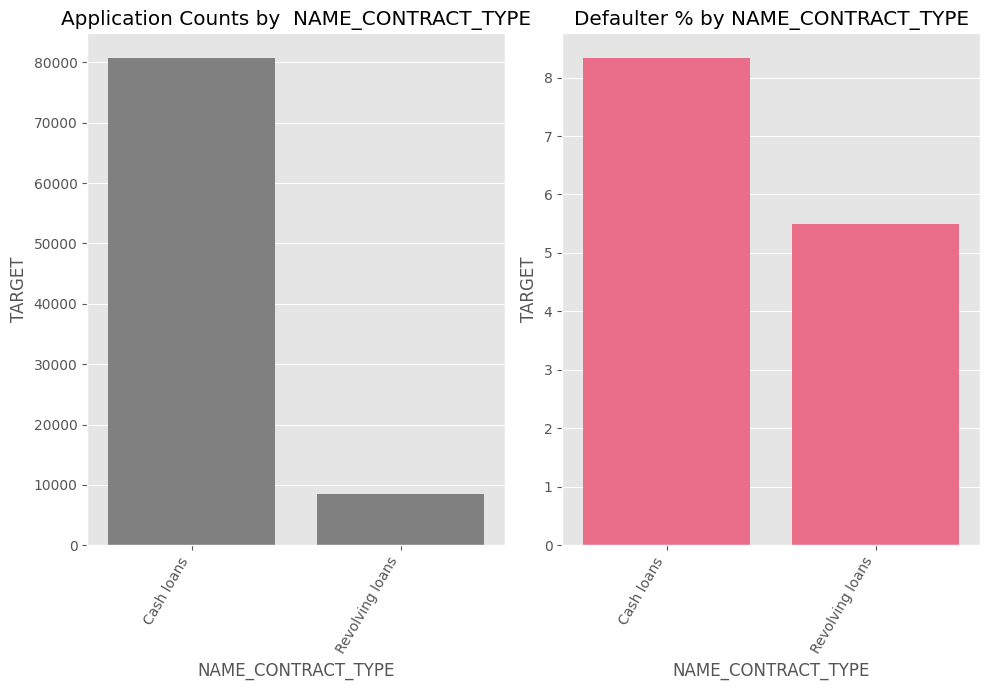

In [ ]:
# Drilldown analysis of NAME_CONTRACT_TYPE
perc_defaulters('NAME_CONTRACT_TYPE')

Insights-
* Majority of the loans are cash loans. Cash loans also have almost double probability of a loan default than revolving loans.

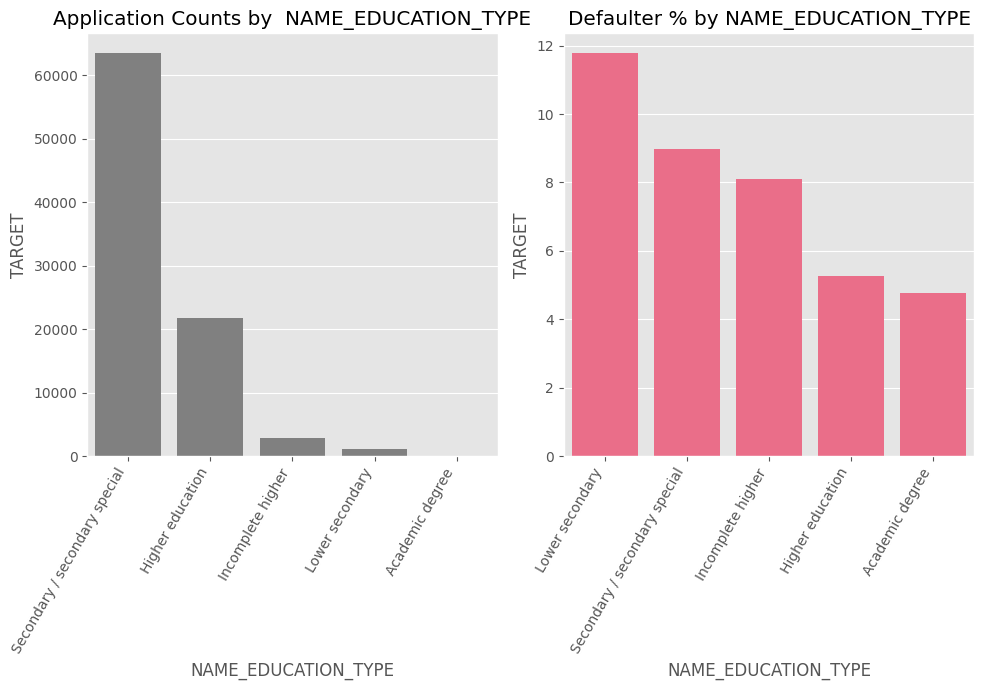

In [ ]:
# Drilldown analysis of NAME_EDUCATION_TYPE
perc_defaulters('NAME_EDUCATION_TYPE')

Insights-
* Higher the education of an applicant, lesser the chance of loan default
* Lower secondary applicants have a concerning 11% loan default rate, but the count of applicants is low
* The major concern is of Secondary education applicants. They have highest applicants and a significant 9% loan default rate as well.

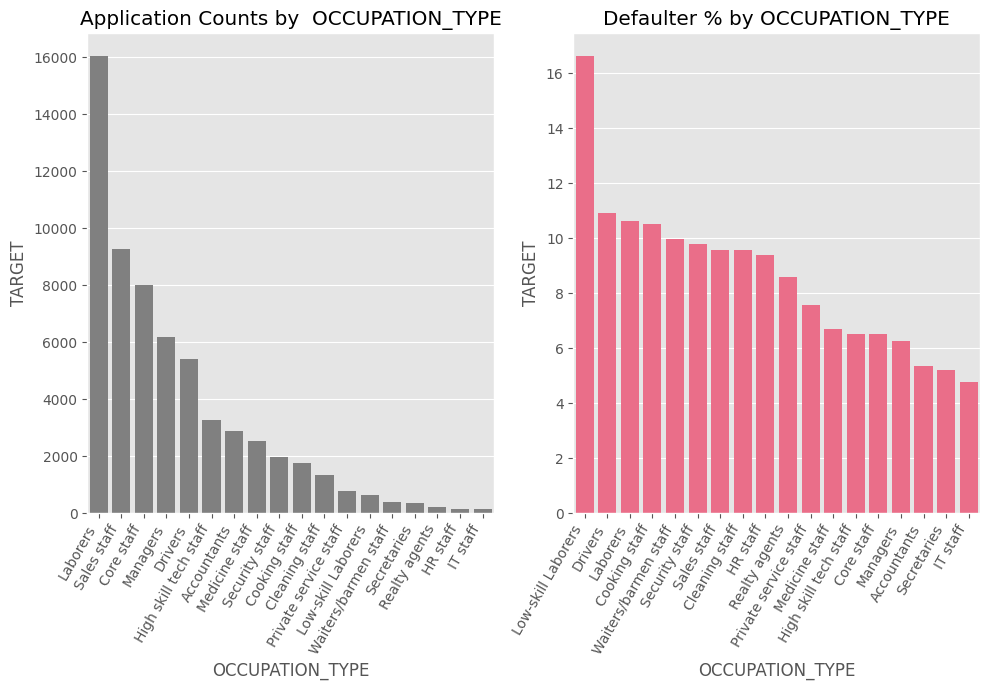

In [ ]:
# Drilldown analysis of OCCUPATION_TYPE

perc_defaulters('OCCUPATION_TYPE')

Insights-
* Low skill labourers  have an alarming 17% loan default rate. The positive here is that they don't have a high applicant count.
* Labourers  & Sales staff will be a major area of concern here, with maximum applicants and a significant loan default rate as well.
* Drivers also have an alarming combination of counts and default %.

##### Pivot table of all loan default %

In [ ]:
perc_defaulters= pd.pivot_table(credit_data_2, values='TARGET',
                      index=['CODE_GENDER','AMT_INCOME_RANGE'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
perc_defaulters*100

NAME_EDUCATION_TYPE           Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_RANGE                                      
F           VERY_LOW                    0.000             5.856   
            LOW                         0.000             4.766   
            MEDIUM                      0.000             5.164   
            HIGH                       22.222             3.514   
            VERY_HIGH                   0.000             4.008   
M           VERY_LOW                    0.000             6.863   
            LOW                         0.000             7.365   
            MEDIUM                      0.000             7.068   
            HIGH                        0.000             4.242   
            VERY_HIGH                   0.000             5.106   

NAME_EDUCATION_TYPE           Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_RANGE                                       
F           VERY_LOW                      5.573            9.677   
            LOW                           7.426            9.859   
            MEDIUM                        8.224           11.200   
            HIGH                          7.407            0.000   
            VERY_HIGH                     8.955           16.667   
M           VERY_LOW                      8.434           13.333   
            LOW                          10.277           17.021   
            MEDIUM                       10.020           14.925   
            HIGH                          7.254           13.793   
            VERY_HIGH                     6.383            8.333   

NAME_EDUCATION_TYPE           Secondary / secondary special  
CODE_GENDER AMT_INCOME_RANGE                                 
F           VERY_LOW                                  7.797  
            LOW                                       7.897  
            MEDIUM                                    7.391  
            HIGH                                      7.461  
            VERY_HIGH                                 6.353  
M           VERY_LOW                                 12.332  
            LOW                                      12.554  
            MEDIUM                                   11.270  
            HIGH                                      9.236  
            VERY_HIGH                                 9.603

Insights -

Categories with more than 9% default rate -
* Females, High Income, Academic degree
* Male, Very Low income , Incomplete higher
* Male, Low Income , Incomplete higher
* Male, Medium Income , Incomplete higher
* Female, Low Income, Lower Secondary
* Female, Medium Income, Lower Secondary
* Male, Very Low Income, Lower Secondary
* Male, Low Income, Lower Secondary
* Male, Medium Income, Lower Secondary
* Male, {ALL INCOME RANGES} , Secondary


##### Bivariate Analysis using Pairplot

In [ ]:
# Data for Pairplot

pairplor_data = credit_data_2[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','TARGET']].fillna(0)

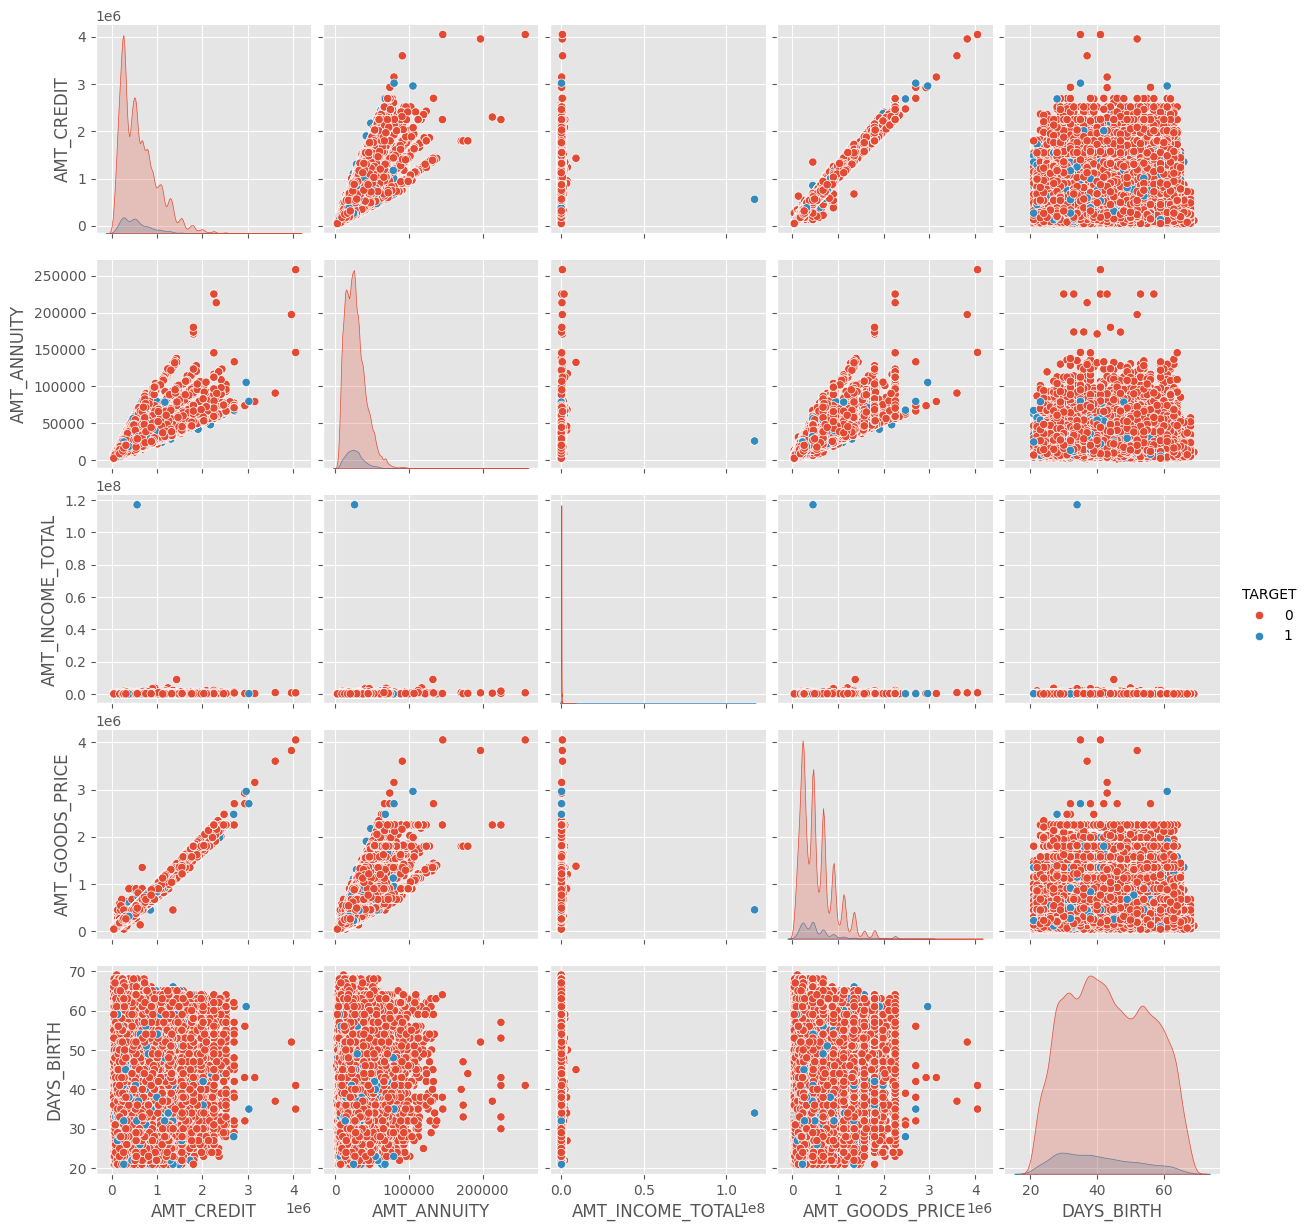

In [ ]:
# Plotting pairplot
sns.pairplot(pairplor_data,hue='TARGET',diag_kind='kde')
plt.show()

Insights-

* AMT_CREDIT & AMT_GOODS_PRICE are correlated  ( With higher priced goods, loan amount is higher)
* AMT_ANNUITY & AMT_GOODS_PRICE are also correlated ( With higher annuity, expensive goods are purchased)
* AMT_ANNUITY & AMT_CREDIT are correlated (Higher the annuity,higher the loan amount)

With respect to TARGET -
* Loan defaulters ( Blue ) are younger in age


##### Correlation Check using Heatmap

In [ ]:
# Data prep for heatmap
heatmap_data = credit_data_2[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT',]].corr(method = 'pearson')

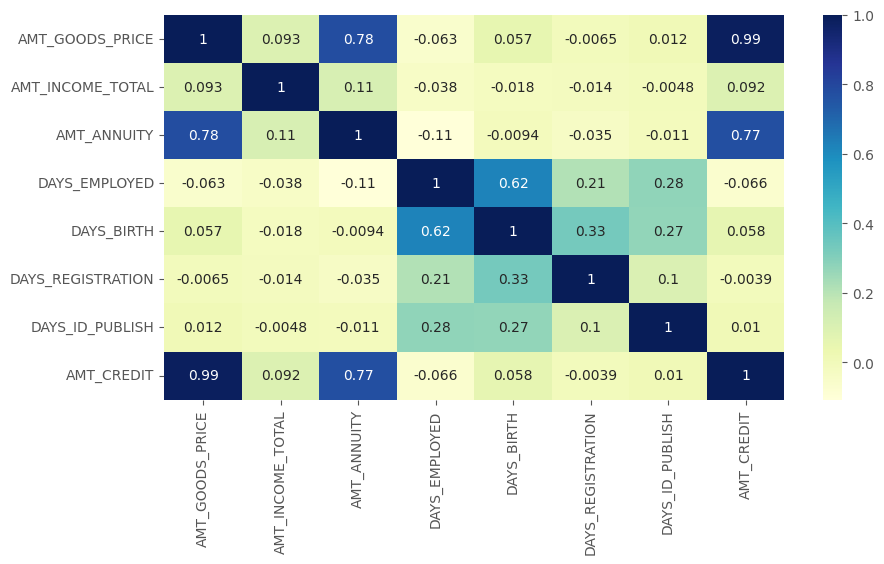

In [ ]:
# Plotting heatmap
sns.heatmap(heatmap_data, annot = True,cmap ='YlGnBu')
plt.show()

Insights-
* The heatmap confirms our correlation findings from pariplot

##### Top 10 correlations in the data

In [ ]:
# Preparing data for getting top 10 correlation combinations

corr_matrix=defaulter[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')                     # Getting Correaltion Matrix

# Filtering top half traingle usng np.triu
corr_matrix=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool_))

corr_matrix_df=corr_matrix.unstack().reset_index()            # Unstacking the last dataframe to get combos of 2 variables
corr_matrix_df

,level_0,level_1,0
0,AMT_GOODS_PRICE,AMT_GOODS_PRICE,NaN
1,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,NaN
2,AMT_GOODS_PRICE,AMT_ANNUITY,NaN
3,AMT_GOODS_PRICE,DAYS_EMPLOYED,NaN
4,AMT_GOODS_PRICE,DAYS_BIRTH,NaN
5,AMT_GOODS_PRICE,DAYS_REGISTRATION,NaN
6,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,NaN
7,AMT_GOODS_PRICE,AMT_CREDIT,NaN
8,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.018
9,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,NaN


In [ ]:
corr_matrix_df.columns = ['Variable 1','Variable 2','Correlation']          # Naming the cols apprpriately
corr_matrix_df.dropna(subset=['Correlation'],inplace=True)                  # Dropping NAs

# Adding absolute column as we are interested in magnitude
corr_matrix_df['Correlation ( Absolute )']=corr_matrix_df['Correlation'].abs()

# Sorting by top correlations and getting top 10 combos
corr_matrix_df.sort_values('Correlation ( Absolute )', ascending=False).head(10)

,Variable 1,Variable 2,Correlation,Correlation ( Absolute )
56,AMT_CREDIT,AMT_GOODS_PRICE,0.982,0.982
58,AMT_CREDIT,AMT_ANNUITY,0.753,0.753
16,AMT_ANNUITY,AMT_GOODS_PRICE,0.751,0.751
35,DAYS_BIRTH,DAYS_EMPLOYED,0.589,0.589
44,DAYS_REGISTRATION,DAYS_BIRTH,0.290,0.290
52,DAYS_ID_PUBLISH,DAYS_BIRTH,0.254,0.254
51,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.232,0.232
43,DAYS_REGISTRATION,DAYS_EMPLOYED,0.199,0.199
60,AMT_CREDIT,DAYS_BIRTH,0.132,0.132
32,DAYS_BIRTH,AMT_GOODS_PRICE,0.131,0.131


# 4. Final Insights

Following are the driving factors for a loan default -

* Lower the highest education of an applicant, higher the chance of loan default.
This is one of the core driving factor in loan defaults.

* Labourers & Sales staff are major area of concern , with maximum applicants and a significant loan default rate. Drivers also have an alarming combination of counts and default %.

* Applicants on Maternity leave have a whopping 40% loan default rate. Unemployed applicants also have 35% loan defaults

* Low Income range have maximum % of loan defaults. As the Income range increases, loan default probability decreases

* Among different family status, married ones have the highest likelihood of loan default

* Applicants with lower Annuity Amount are slightly more likely to default on a loan.

* Young applicants are more expected to default on a loan.

* More Men deafault loans as compared to Women



## 🔍 Final Insights: Loan Default EDA Project

### 1. **Gender and Default**
- **Men** are more likely to **default** compared to women.
- Although fewer in the overall applicant pool, their default percentage is **disproportionately higher**.

### 2. **Income and Default**
- Applicants with **low income** are more likely to default.
- **Higher income groups** show lower default percentages, indicating income stability reduces risk.

### 3. **Education and Default**
- **Higher education** is associated with **fewer defaults**.
- Applicants with **lower educational levels** tend to have higher default rates.

### 4. **Employment and Default**
- **Unemployed and lower-tenure employees** have a higher chance of default.
- People with **stable, long-term jobs** tend to repay loans better.

### 5. **Loan & Credit Correlation**
- **AMT_CREDIT**, **AMT_ANNUITY**, and **AMT_GOODS_PRICE** are strongly correlated.
- Higher loan amounts are associated with higher annuities and more expensive goods.

### 6. **Age and Default**
- **Younger individuals** are more likely to default.
- Older applicants are generally more financially responsible or cautious.

### 7. **Family Status & Income**
- **Married applicants** and those in **civil marriages** generally show better repayment behavior.
- Family stability and dual-income households may contribute to this.

### 8. **Drilldown Analysis**
- Specific segments (e.g., **low-income + low education**) show **very high default %**.
- Can help design targeted lending rules and risk-mitigation strategies.

---

## ✅ Conclusion
Demographic, financial, and behavioral features like **gender, age, income, education, and employment status** play a critical role in determining **loan default risk**.  
These insights can guide:
- **Risk-based loan approvals**
- **Targeted credit policies**
- **Financial education initiatives**  
to reduce future defaults and build a healthier loan portfolio.

